# Task 1: Data Preparation
- Load the dataset using the “pandas” library
- identify and handle missing data and 
- provide explanations for how the missing data is handled

## 1.1 Reading the Data

In [3]:
# import pandas library using alias pd
import pandas as pd

# import numpy with alias np
import numpy as np

#import seaborn with alias sns
import seaborn as sns


# for Task 5:
#!pip install scikit-learn
# import KMeans for clustering 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale

# for Task 6: 
# import a scaler to scale the data
from sklearn.preprocessing import StandardScaler
# import PCA to perform principal component analysis
from sklearn.decomposition import PCA

import squarify 
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
# load the data
penguin_data = pd.read_csv(filepath_or_buffer='penguins_lter.csv')

# view first few rows of the data
penguin_data.head(5)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


### Column Descriptions
1. `studyName` - Sampling expedition from which data were collected, generated, etc.
2. `Sample Number` - an integer denoting the continuous numbering sequence for each sample
3. `Species` - a character string denoting the penguin species
4. `Region` - a character string denoting the region of Palmer LTER sampling grid
5. `Island` - a character string denoting the island near Palmer Station where samples were collected
6. `Stage` - a character string denoting reproductive stage at sampling
7. `Individual ID` - a character string denoting the unique ID for each individual in dataset
8. `Clutch Completion` - a character string denoting if the study nest observed with a full clutch, i.e., 2 eggs
9. `Date Egg` - a date denoting the date study nest observed with 1 egg (sampled)
10. `Culmen Length` - a number denoting the length of the dorsal ridge of a bird's bill (millimetres)
11. `Culmen Depth` - a number denoting the depth of the dorsal ridge of a bird's bill (millimetres)
12. `Flipper Length` - an integer denoting the length penguin flipper (millimetres)
13. `Body Mass` - an integer denoting the penguin body mass (grams)
14. `Sex` - a character string denoting the sex of an animal
15. `Delta 15 N` - a number denoting the measure of the ratio of stable isotopes 15N:14N
16. `Delta 13 C` - a number denoting the measure of the ratio of stable isotopes 13C:12C
17. `Comments` - a character string with text providing additional relevant information for data


## 1.2 Identifying Missing Data

In [5]:
# Shape of the data
penguin_data.shape

(344, 17)

It can be observed that the dataset has 344 rows and 17 columns.

In [6]:
# Consise Summary of the dataset
penguin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [7]:
penguin_data.isna().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

Currently the data has missing values in <mark>Culmen Length (mm)</mark> <mark>Culmen Depth (mm)</mark>, <mark>Flipper Length (mm)</mark>, 
<mark>Body Mass (g)</mark>, <mark>Sex</mark>, <mark>Delta 15 N (o/oo)</mark>, <mark>Delta 13 C (o/oo)</mark>, and <mark>Comments</mark> columns.

The missing data can be best handled in the following ways:
* Find the replacement values for the missing values from the original source of data 
* Impute the missing data using the best estimate of the missing values based on non-missing values 

## 1.3 Handling Missing Data

For the colums with numerical values, we impute the mean of the column values into the dataset. For the <mark>Comments</mark> column, we will impute an empty character string, since there are no comments for that sample penguin data entry. For the rest of the non numerical columns, we will impute a random character string from the existing column values into the missing column values of the dataset.

### 1.3.1 Numerical data

In [8]:
# Impute missing culmen length column entries with the mean of the available culmen length values
non_missing_culmen_length_mean = np.round(penguin_data[penguin_data.notna()]["Culmen Length (mm)"].mean())
penguin_data["Culmen Length (mm)"].fillna(non_missing_culmen_length_mean, inplace=True)

# Impute missing culmen depth column entries with the mean of the available culmen depth values
non_missing_culmen_depth_mean = np.round(penguin_data[penguin_data.notna()]["Culmen Depth (mm)"].mean())
penguin_data["Culmen Depth (mm)"].fillna(non_missing_culmen_depth_mean, inplace=True)

# Impute missing flipper length column entries with the mean of the available flipper length values
non_missing_flipper_length_mean = np.round(penguin_data[penguin_data.notna()]["Flipper Length (mm)"].mean())
penguin_data["Flipper Length (mm)"].fillna(non_missing_flipper_length_mean, inplace=True)

# Impute missing body mass column entries with the mean of the available body mass values
non_missing_body_mass_mean = np.round(penguin_data[penguin_data.notna()]["Body Mass (g)"].mean())
penguin_data["Body Mass (g)"].fillna(non_missing_body_mass_mean, inplace=True)

# Impute missing Delta 15 N (o/oo) column entries with the mean of the available Delta 15 N (o/oo) values
non_missing_delta_15N_mean = np.round(penguin_data[penguin_data.notna()]["Delta 15 N (o/oo)"].mean())
penguin_data["Delta 15 N (o/oo)"].fillna(non_missing_delta_15N_mean, inplace=True)

# Impute missing Delta 13 C (o/oo) column entries with the mean of the available Delta 13 C (o/oo) values
non_missing_delta_13C_mean = np.round(penguin_data[penguin_data.notna()]["Delta 13 C (o/oo)"].mean())
penguin_data["Delta 13 C (o/oo)"].fillna(non_missing_delta_13C_mean, inplace=True)

The reason we're imputing missing values in columns (with numerical values) with the mean of their available values is that it provides a rough estimation (or) valid inference on what the missing value would have been based on the data that we do have. The mean of the values would be a better representation of the missing value than extracting a random value from the available values of the column to be chosen for imputation, since we can perhaps impute maybe the largest or smallest values into the column this way, and the chances of this being an accurate representation of the missing entries however are low.

### 1.3.2 Comments

We replace missing values in the <mark>Comments</mark> column with an empty character string since there are no available comments for that penguin sample data entry that was made during the sampling process, and even if comments for those entries exist, we do not have them available.

In [9]:
penguin_data["Comments"].fillna("", inplace=True)

### 1.3.3 Non-Numerical Data (Sex Column)

In [10]:
# set random seed for reproducibility of the results
np.random.seed(15)

# extract non-missing values from the sex column
non_missing_sex = penguin_data.loc[penguin_data["Sex"].notna(), "Sex"]

# extract indices of missing rows from the sex column
missing_sex_indices = penguin_data.loc[penguin_data["Sex"].isna(), "Sex"].index

# impute missing values
penguin_data.loc[missing_sex_indices, "Sex"] = np.random.choice(a=non_missing_sex, size=missing_sex_indices.size)

The reason we're imputing missing values in columns (with non-numerical values) with a random selection of their available values is that it is difficult to predict/estimate what the missing values in the <mark>Sex</mark> column could be. There are only 2 values for the column: "Male" and "Female", and the missing value could be either of those.

In [11]:
# verify that there no missing values in the columns
penguin_data.isna().sum()

studyName              0
Sample Number          0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
Comments               0
dtype: int64

We see that there are no missing values left to handle...

# Task 2: Exploratory Data Analysis (EDA)

Perform detailed univariate and bivariate EDA for relevant columns in the dataset
- Produce plots
- report your observation and findings for each plot clearly
    



## 2.1 Univariate EDA

### Column 'Individual ID'

In [12]:
# summarize Individual Id
penguin_data["Individual ID"].describe()

count       344
unique      190
top       N61A2
freq          3
Name: Individual ID, dtype: object

In [13]:
# checking for duplicate data entries...
penguin_data.duplicated().sum()

0

It can be observed that there are no duplicate entries.

### Column 'studyName'

In [14]:
# Summarize studyName
penguin_data["studyName"].describe()

count         344
unique          3
top       PAL0910
freq          120
Name: studyName, dtype: object

In [15]:
# View unique values
penguin_data["studyName"].unique()

array(['PAL0708', 'PAL0809', 'PAL0910'], dtype=object)

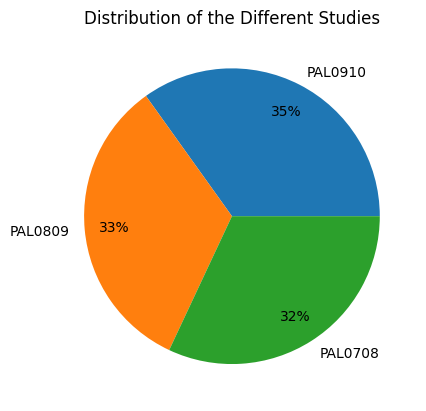

In [16]:
# Distribution of the studyName column values
study_distribution = penguin_data["studyName"].value_counts()

# Make a pie chart
study_pie = study_distribution.plot.pie(autopct='%1.0f%%', pctdistance=0.8, radius=1, title="Distribution of the Different Studies")
study_pie.axis('off');

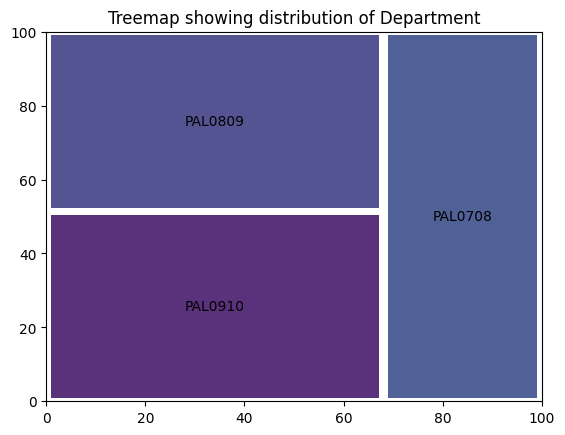

In [17]:
# Treemap of the Studies column 
ax=squarify.plot(sizes=study_distribution, label=study_distribution.index, alpha=0.9, pad=True)
plt.title("Treemap showing distribution of Department");

It can be observed that there are 3 different studies that have sampled the penguins in this dataset, and they each have contributed a similar number of penguin samples within this dataset (33%, 35%, and 32% for PAL0809, PAL0910, and PAL0708 respectively).

### Column 'Species'

In [18]:
# Summarize Species
penguin_data["Species"].describe()

count                                     344
unique                                      3
top       Adelie Penguin (Pygoscelis adeliae)
freq                                      152
Name: Species, dtype: object

In [19]:
# View unique values
penguin_data["Species"].unique()

array(['Adelie Penguin (Pygoscelis adeliae)',
       'Chinstrap penguin (Pygoscelis antarctica)',
       'Gentoo penguin (Pygoscelis papua)'], dtype=object)

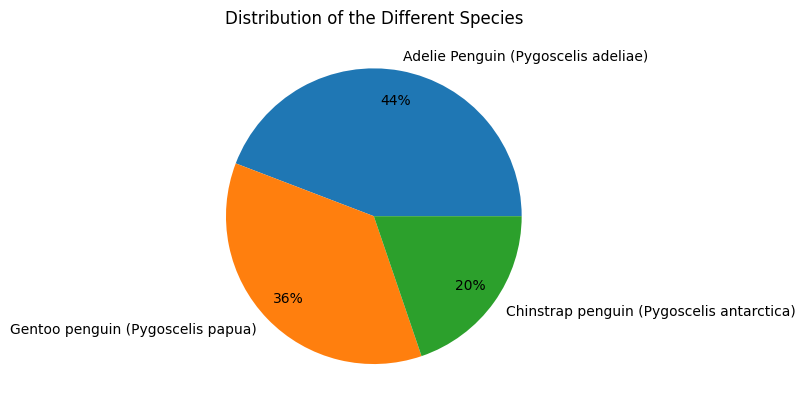

In [20]:
# Distribution of the Species column values
species_distribution = penguin_data["Species"].value_counts()

# Make a pie chart
species_pie = species_distribution.plot.pie(autopct='%1.0f%%', pctdistance=0.8, radius=1, title="Distribution of the Different Species")
species_pie.axis('off');

It can be observed that there are three different species of penguins sampled in the dataset: Adelie Penguin (Pygoscelis adeliae) (44%), Chinstrap penguin (Pygoscelis antarctica) (20%), and Gentoo penguin (Pygoscelis papua) (36%). The Adelie Penguin (Pygoscelis adeliae) species comprises the majority of the samples within the dataset, wheras the Chinstrap penguin (Pygoscelis antarctica) species comprises the minority of species in the dataset.

### Column 'Island'

In [21]:
# Summarize Island
penguin_data["Island"].describe()

count        344
unique         3
top       Biscoe
freq         168
Name: Island, dtype: object

In [22]:
# View unique values
penguin_data["Island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

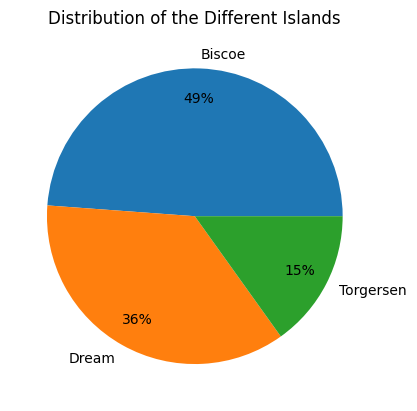

In [23]:
# Distribution of the Island column values
island_distribution = penguin_data["Island"].value_counts()

# Make a pie chart
island_pie = island_distribution.plot.pie(autopct='%1.0f%%', pctdistance=0.8, radius=1, title="Distribution of the Different Islands")
island_pie.axis('off');

It can be observed that the penguins were sampled from 3 different islands near the Palmer station: Biscoe (49%), Torgersen (15%), and Dream (36%). We see that most of the penguin samples come from Biscoe, whereas the least number of the penguin samples come from Torgersen.

### Column 'Stage' & 'Region

In [24]:
# Summarize Stage
penguin_data["Stage"].describe()

count                    344
unique                     1
top       Adult, 1 Egg Stage
freq                     344
Name: Stage, dtype: object

In [25]:
# View unique values
penguin_data["Stage"].unique()

array(['Adult, 1 Egg Stage'], dtype=object)

We can see that there is only one reproductive stage recorded within the samples: Adult, 1 Egg Stage.

In [26]:
# View unique regions
penguin_data["Region"].unique()

array(['Anvers'], dtype=object)

We can see that there is only one region (Anvers) from which the penguins have been sampled.

### Column 'Clutch Completion'

In [27]:
# Summarize Clutch Completion
penguin_data["Clutch Completion"].describe()

count     344
unique      2
top       Yes
freq      308
Name: Clutch Completion, dtype: object

In [28]:
# View unique values
penguin_data["Clutch Completion"].unique()

array(['Yes', 'No'], dtype=object)

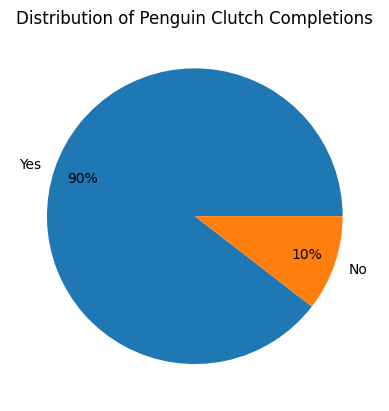

In [29]:
# Distribution of the Clutch Completion column values
clutch_completion_distribution = penguin_data["Clutch Completion"].value_counts()

# Make a pie chart
clutch_completion_pie = clutch_completion_distribution.plot.pie(autopct='%1.0f%%', pctdistance=0.8, radius=1, title="Distribution of Penguin Clutch Completions")
clutch_completion_pie.axis('off');

It can be observed that most (90%) of the study samples in the data set were observed with a full clutch, i.e, 2 eggs.

### Column 'Date Egg'

In [30]:
# Summarize Date Egg
penguin_data["Date Egg"].describe()

count          344
unique          50
top       11/27/07
freq            18
Name: Date Egg, dtype: object

In [31]:
# View unique values
penguin_data["Date Egg"].unique()

array(['11/11/07', '11/16/07', '11/15/07', '11/9/07', '11/12/07',
       '11/10/07', '11/13/07', '11/19/07', '11/6/08', '11/9/08',
       '11/15/08', '11/13/08', '11/11/08', '11/14/08', '11/8/08',
       '11/2/08', '11/7/08', '11/17/08', '11/5/08', '11/10/08', '11/9/09',
       '11/15/09', '11/20/09', '11/12/09', '11/17/09', '11/18/09',
       '11/22/09', '11/16/09', '11/21/09', '11/23/09', '11/10/09',
       '11/13/09', '11/14/09', '11/26/07', '11/21/07', '11/28/07',
       '11/22/07', '11/30/07', '12/3/07', '11/25/08', '11/24/08',
       '11/27/09', '11/19/09', '11/27/07', '11/18/07', '11/29/07',
       '11/4/08', '11/3/08', '11/25/09', '12/1/09'], dtype=object)

<Axes: title={'center': 'Distribution of Date Egg'}, xlabel='Date Egg', ylabel='Count of Date Egg'>

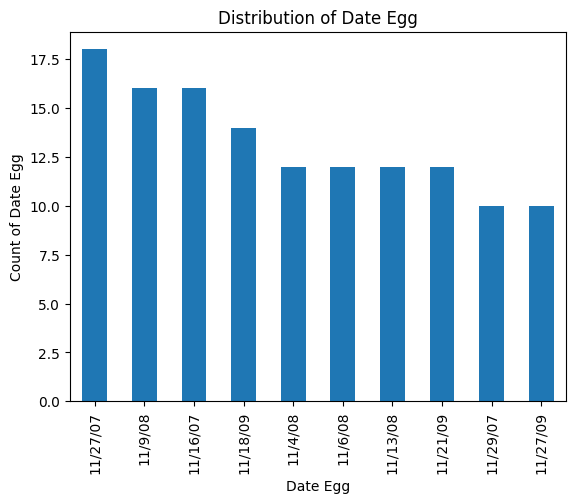

In [32]:
# Distribution of the Date Egg column values
date_distribution = penguin_data["Date Egg"].value_counts().nlargest(10)

# Plot of the distribution of Date Egg column 
date_distribution.plot.bar(xlabel="Date Egg", ylabel="Count of Date Egg", grid=False, title="Distribution of Date Egg")

It can be observed that most of the penguin samples that the study nest observed with 1 egg was on the date `11/27/07`, followed by `11/9/08`.

### Column 'Culmen Length (mm)'

In [33]:
# Summarize culmen length
penguin_data["Culmen Length (mm)"].describe()

count    344.000000
mean      43.922384
std        5.443647
min       32.100000
25%       39.275000
50%       44.250000
75%       48.500000
max       59.600000
Name: Culmen Length (mm), dtype: float64

In [34]:
# View unique values
penguin_data["Culmen Length (mm)"].unique()

array([39.1, 39.5, 40.3, 44. , 36.7, 39.3, 38.9, 39.2, 34.1, 42. , 37.8,
       41.1, 38.6, 34.6, 36.6, 38.7, 42.5, 34.4, 46. , 37.7, 35.9, 38.2,
       38.8, 35.3, 40.6, 40.5, 37.9, 37.2, 40.9, 36.4, 42.2, 37.6, 39.8,
       36.5, 40.8, 36. , 44.1, 37. , 39.6, 37.5, 42.3, 40.1, 35. , 34.5,
       41.4, 39. , 35.7, 41.3, 41.6, 35.5, 41.8, 33.5, 39.7, 45.8, 42.8,
       36.2, 42.1, 42.9, 35.1, 37.3, 36.3, 36.9, 38.3, 34. , 38.1, 33.1,
       43.2, 41. , 45.6, 42.7, 40.2, 35.2, 41.5, 38.5, 43.1, 36.8, 35.6,
       32.1, 40.7, 46.5, 50. , 51.3, 45.4, 52.7, 45.2, 46.1, 46.6, 51.7,
       47. , 52. , 45.9, 50.5, 50.3, 58. , 46.4, 49.2, 42.4, 48.5, 50.6,
       46.7, 49.5, 52.8, 54.2, 51. , 49.7, 47.5, 47.6, 46.9, 53.5, 49. ,
       46.2, 50.9, 45.5, 50.8, 50.1, 51.5, 49.8, 48.1, 51.4, 45.7, 50.7,
       52.2, 49.3, 50.2, 51.9, 46.8, 55.8, 43.5, 49.6, 48.7, 43.3, 48.4,
       45.1, 46.3, 44.5, 47.8, 48.2, 47.3, 59.6, 49.1, 42.6, 44.4, 45.3,
       43.6, 44.9, 45. , 43.8, 50.4, 54.3, 47.7, 48

<Axes: title={'center': 'Distribution of Culmen Length'}>

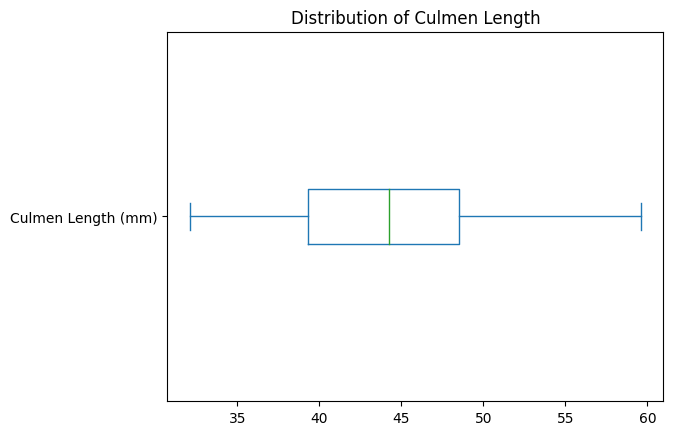

In [35]:
# Box plot of culmen length
penguin_data["Culmen Length (mm)"].plot.box(vert=False, title="Distribution of Culmen Length")

It can be observed that the culmen length column doesn't have any outlers as evident from the box-plot above.

### Column 'Culmen Depth (mm)'

In [36]:
# Summarize Culmen Depth
penguin_data["Culmen Depth (mm)"].describe()

count    344.000000
mean      17.150291
std        1.969061
min       13.100000
25%       15.600000
50%       17.300000
75%       18.700000
max       21.500000
Name: Culmen Depth (mm), dtype: float64

In [37]:
# View unique values
penguin_data["Culmen Depth (mm)"].unique()

array([18.7, 17.4, 18. , 17. , 19.3, 20.6, 17.8, 19.6, 18.1, 20.2, 17.1,
       17.3, 17.6, 21.2, 21.1, 19. , 20.7, 18.4, 21.5, 18.3, 19.2, 17.2,
       18.9, 18.6, 17.9, 16.7, 20. , 18.5, 19.1, 19.7, 16.9, 18.8, 17.7,
       19.5, 17.5, 16.6, 18.2, 16.2, 19.4, 16.8, 16.1, 20.3, 16. , 16.5,
       20.5, 19.8, 15.9, 20.1, 15.5, 19.9, 20.8, 16.4, 13.2, 16.3, 14.1,
       15.2, 14.5, 13.5, 14.6, 15.3, 13.4, 15.4, 13.7, 15.7, 15.1, 14.3,
       15.8, 13.1, 15. , 14.2, 14.8, 13.6, 13.9, 13.3, 14.4, 13.8, 14.9,
       15.6, 14. , 14.7])

<Axes: title={'center': 'Distribution of culmen depth'}>

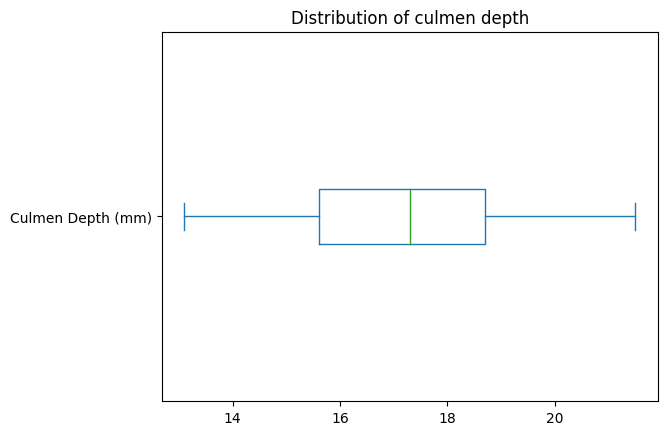

In [38]:
# Box plot of the culmen depth
penguin_data["Culmen Depth (mm)"].plot.box(vert=False, title="Distribution of culmen depth")

It can be observed that the culmen depth column doesn't have any outliers as evidenced from the box-plot.

### Column 'Flipper Length (mm)'

In [39]:
# Summarize Flipper Length
penguin_data["Flipper Length (mm)"].describe()

count    344.000000
mean     200.915698
std       14.020659
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: Flipper Length (mm), dtype: float64

In [40]:
# view unique values
penguin_data["Flipper Length (mm)"].unique()

array([181., 186., 195., 201., 193., 190., 180., 182., 191., 198., 185.,
       197., 184., 194., 174., 189., 187., 183., 172., 178., 188., 196.,
       179., 200., 192., 202., 205., 208., 203., 199., 176., 210., 212.,
       206., 207., 211., 230., 218., 215., 219., 209., 214., 216., 213.,
       217., 221., 222., 220., 225., 224., 231., 229., 223., 228., 226.])

<Axes: title={'center': 'Distribution of Flipper Length'}>

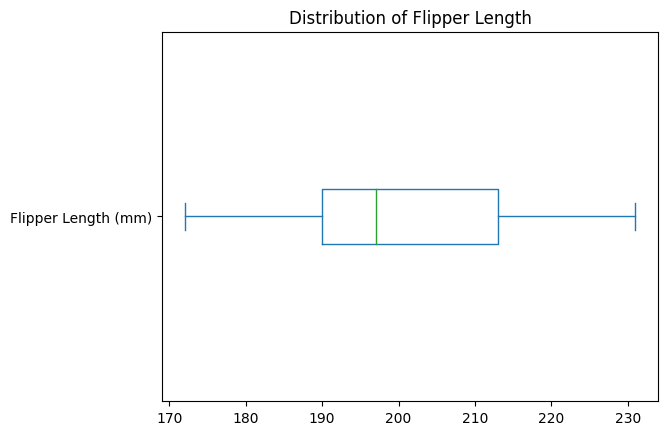

In [41]:
# box plot of the flipper lengths
penguin_data["Flipper Length (mm)"].plot.box(vert=False, title="Distribution of Flipper Length")

It can be observed that there are no outliers in the flipper length values as evident from the box-plot

### Column 'Body Mass (g)'

In [42]:
# Summarize Body Mass
penguin_data["Body Mass (g)"].describe()

count     344.000000
mean     4201.755814
std       799.613058
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: Body Mass (g), dtype: float64

In [43]:
# View unique values
penguin_data["Body Mass (g)"].unique()

array([3750., 3800., 3250., 4202., 3450., 3650., 3625., 4675., 3475.,
       4250., 3300., 3700., 3200., 4400., 4500., 3325., 4200., 3400.,
       3600., 3950., 3550., 3150., 3900., 4150., 4650., 3100., 3000.,
       4600., 3425., 2975., 3500., 4300., 4050., 2900., 2850., 3350.,
       4100., 3050., 4450., 4000., 4700., 4350., 3725., 4725., 3075.,
       2925., 3175., 4775., 3825., 4275., 4075., 3775., 3875., 3275.,
       4475., 3975., 3525., 3575., 4550., 3850., 4800., 2700., 3675.,
       5700., 5400., 5200., 5150., 5550., 5850., 6300., 5350., 5000.,
       5050., 5100., 5650., 5250., 6050., 4950., 4750., 4900., 5300.,
       4850., 5800., 6000., 5950., 4625., 5450., 5600., 4875., 4925.,
       4975., 5500., 4575., 4375., 5750.])

<Axes: title={'center': 'Distribution of Body Mass'}>

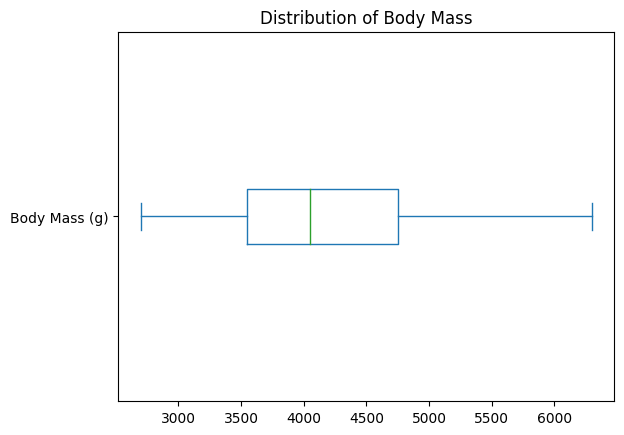

In [44]:
# box plot of the body mass values
penguin_data["Body Mass (g)"].plot.box(vert=False, title="Distribution of Body Mass")

It can be observed that there are no outliers in the `Body Mass (g)` column as evident from the box-plot.

### Column 'Sex'

In [45]:
# Summarize Sex
penguin_data["Sex"].describe()

count      344
unique       3
top       MALE
freq       174
Name: Sex, dtype: object

In [46]:
# Check the different unique values in the sex column
penguin_data["Sex"].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

We see here that there is a non valid value <mark>'.'</mark> in the sex column which also needs to be addressed...
We will substitute the `'.'` values randomly with either `Male` or `Female` since we don't know what these values are.

In [47]:
# set random seed for reproducibility of the results
np.random.seed(20)

# extract valid sex values from the sex column
valid_sex_values = penguin_data.loc[penguin_data["Sex"] != '.', "Sex"]

# extract indices of invalid sex rows from the sex column
invalid_sex_indices = penguin_data.loc[penguin_data["Sex"] == '.', "Sex"].index

# impute missing values
penguin_data.loc[invalid_sex_indices, "Sex"] = np.random.choice(a=valid_sex_values, size=invalid_sex_indices.size)

In [48]:
# Check to see if the sex column has only male or female as its values
penguin_data["Sex"].unique()

array(['MALE', 'FEMALE'], dtype=object)

In [49]:
penguin_data["Sex"].describe()

count      344
unique       2
top       MALE
freq       175
Name: Sex, dtype: object

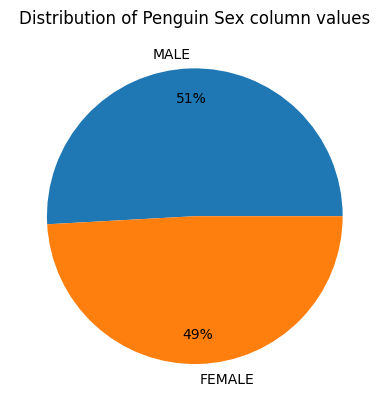

In [50]:
# distribution of the sex column values
sex_distribution = penguin_data["Sex"].value_counts()

# Make a pie chart
sex_pie = sex_distribution.plot.pie(autopct='%1.0f%%', pctdistance=0.8, radius=1, title="Distribution of Penguin Sex column values")
sex_pie.axis("off");

It can be observed that the penguin samples in the data have an (nearly) even distribution of sex types (51% males and 49% females).

### Column 'Delta 15 N (o/oo)'

In [51]:
# Summarize Delta 15 N
penguin_data["Delta 15 N (o/oo)"].describe()

count    344.000000
mean       8.744232
std        0.542962
min        7.632200
25%        8.307415
50%        8.687455
75%        9.136170
max       10.025440
Name: Delta 15 N (o/oo), dtype: float64

In [52]:
# View the unique values
penguin_data["Delta 15 N (o/oo)"].unique()

array([ 9.     ,  8.94956,  8.36821,  8.76651,  8.66496,  9.18718,
        9.4606 ,  9.13362,  8.63243,  8.55583,  9.18528,  8.67538,
        8.47827,  9.11616,  8.73762,  8.66271,  9.22286,  8.43423,
        9.63954,  9.21292,  8.93997,  8.08138,  8.38404,  8.90027,
        9.69756,  9.72764,  9.66523,  8.79665,  9.17847,  9.15308,
        9.18985,  8.04787,  9.41131,  9.68933,  9.50772,  9.2372 ,
        9.36392,  9.49106,  9.51784,  8.87988,  8.46616,  8.51362,
        8.19539,  8.48095,  8.41837,  8.35396,  8.57199,  8.56674,
        9.07878,  9.108  ,  8.96472,  8.74802,  8.58063,  8.62264,
        8.62623,  8.85562,  8.56192,  8.71078,  8.47781,  8.86853,
        7.88863,  9.29808,  8.33524,  8.18658,  8.70642,  8.2993 ,
        8.47257,  8.3554 ,  7.82381,  9.05736,  7.69778,  8.63259,
        7.88494,  8.90002,  8.32718,  9.14863,  8.57087,  8.59147,
        9.07826,  8.36936,  8.46531,  8.77018,  8.01485,  8.49915,
        8.90723,  8.48204,  8.10277,  8.39459,  9.04218,  8.97

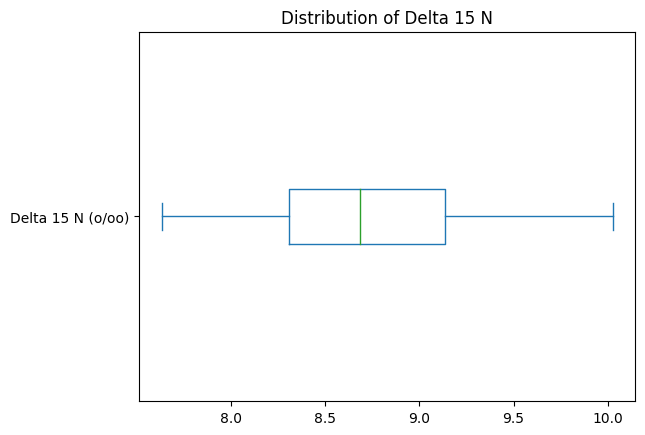

In [53]:
# Box plot of the Delta 15 N (o/oo) column values
penguin_data["Delta 15 N (o/oo)"].plot.box(vert=False, title="Distribution of Delta 15 N");

It can be observed that the column has no outliers as evident from the box-plot.

### Column 'Delta 13 C (o/oo)'

In [54]:
# Summarize Delta 13 C (o/oo)
penguin_data["Delta 13 C (o/oo)"].describe()

count    344.000000
mean     -25.698147
std        0.781071
min      -27.018540
25%      -26.285460
50%      -25.897090
75%      -25.089467
max      -23.787670
Name: Delta 13 C (o/oo), dtype: float64

In [55]:
# View the unique values
penguin_data["Delta 13 C (o/oo)"].unique()

array([-26.     , -24.69454, -25.33302, -25.32426, -25.29805, -25.21799,
       -24.89958, -25.09368, -25.21315, -25.22588, -25.06691, -25.13993,
       -25.23319, -24.77227, -25.09383, -25.0639 , -25.03474, -25.22664,
       -25.29856, -24.3613 , -25.36288, -25.49448, -25.19837, -25.11609,
       -25.11223, -25.0102 , -25.0602 , -25.14591, -25.23061, -25.03469,
       -25.12255, -25.49523, -25.04169, -24.4228 , -25.03492, -24.52698,
       -25.01745, -24.10255, -25.07683, -25.18543, -26.12989, -26.55602,
       -26.17213, -26.3146 , -26.54718, -26.27853, -26.07188, -25.98843,
       -25.88156, -25.89677, -26.40943, -26.37809, -26.21569, -26.60023,
       -26.1165 , -26.09294, -25.95541, -25.81012, -26.07821, -26.06209,
       -26.63085, -25.23453, -26.55351, -26.45978, -26.15003, -26.38986,
       -26.02002, -26.44787, -26.51382, -25.81513, -26.5387 , -26.23027,
       -26.24837, -26.46254, -26.38396, -26.09635, -26.22227, -26.08165,
       -26.12417, -26.11199, -26.05621, -25.83352, 

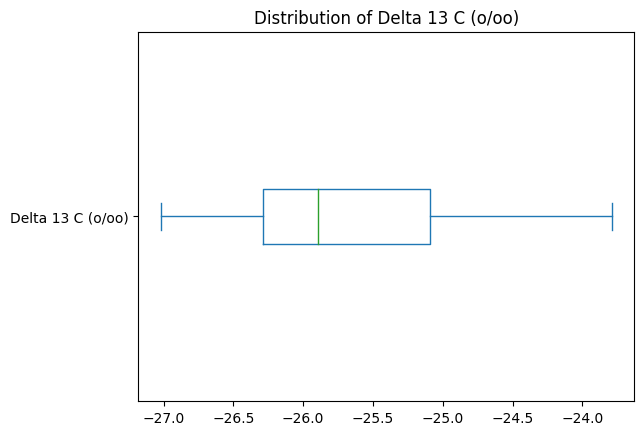

In [56]:
# Box plot of the Delta 13 C (o/oo) column values
penguin_data["Delta 13 C (o/oo)"].plot.box(vert=False, title="Distribution of Delta 13 C (o/oo)");

It can be observed that the column has no outliers as observed from the box-plot.

### Column 'Comments'

In [57]:
# Summarize Comments
penguin_data["Comments"].describe()

count     344
unique      8
top          
freq      318
Name: Comments, dtype: object

In [58]:
# View unique values
penguin_data["Comments"].unique()

array(['Not enough blood for isotopes.', '', 'Adult not sampled.',
       'Nest never observed with full clutch.',
       'No blood sample obtained.',
       'No blood sample obtained for sexing.',
       'Nest never observed with full clutch. Not enough blood for isotopes.',
       'Sexing primers did not amplify. Not enough blood for isotopes.'],
      dtype=object)

There are some inconsistent comments here. Multiple comments are trying to give the same information, but they have been written in different ways. Let's fix the inconsistency.

In [59]:
# define replacement dictionary
comment_replacement = {'No blood sample obtained for sexing.':"Not enough blood for isotopes.", 
                         'Adult not sampled.':"Not enough blood for isotopes.",
                         'No blood sample obtained.':"Not enough blood for isotopes.", 
                         'Sexing primers did not amplify. Not enough blood for isotopes.':"Nest never observed with full clutch. Not enough blood for isotopes."
                       }

# perform replacement
penguin_data["Comments"] = penguin_data["Comments"].replace(comment_replacement)

# verify that comments values are now consistent
penguin_data["Comments"].unique()

array(['Not enough blood for isotopes.', '',
       'Nest never observed with full clutch.',
       'Nest never observed with full clutch. Not enough blood for isotopes.'],
      dtype=object)

<Axes: title={'center': 'Distribution of Comments'}, ylabel='count'>

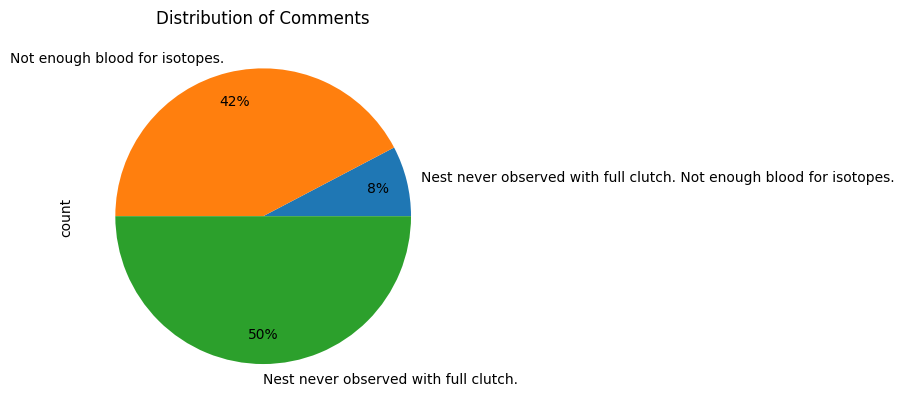

In [60]:
# Distribution of the Comments column values
comment_distribution = penguin_data["Comments"].value_counts().nsmallest(3)

# Make a pie chart
comment_distribution.plot.pie(autopct='%1.0f%%', pctdistance=0.8, radius=1, title="Distribution of Comments")

It can be observed that the majority of the comments were empty string characters, however we see that wherever comments were made, most of them (50%) were addressing the fact that the nest didn't observe a full clutch. 42% of them commented "Not enough blood for isotopes.", and 8% of them commented "Nest never observed with full clutch. Not enough blood for isotopes".

## 2.2 Bivariate EDA

We will be focussing primarily on `Clutch Completion` column values in this Bivariate EDA as it is the column I find to be interesting because from my interpretation, I find that the studies that the dataset was based on was measuring physical attributes of penguins and collecting their blood samples with an end goal of identifying whether the study nest observed with a full clutch.

Some bivariate plots for EDA will made with regards to the `Species` column as well, to see whether there are any differences in attributes based on the species of penguin.

### Culmen Length and Clutch Completion

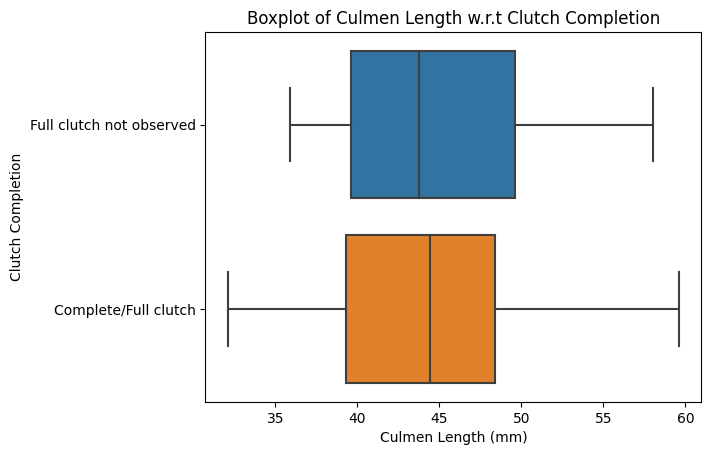

In [61]:
# Convert Clutch completion column of yes/no values to integer equivalents
clutch_completion_replacement = {'Yes': 1, 'No': 0}
penguin_data["Clutch Completion"] = penguin_data["Clutch Completion"].replace(clutch_completion_replacement)

# boxplot of Culmen Length against Clutch Completion
sns.boxplot(data=penguin_data, x="Culmen Length (mm)", y="Clutch Completion", orient="h")#
plt.title("Boxplot of Culmen Length w.r.t Clutch Completion")
plt.yticks(ticks=[0, 1], labels=["Full clutch not observed", "Complete/Full clutch"]);

It can be observed that the Culmen Length distribution for incomplete and complete clutch vary slightly, therefore `Culmen Length` is not a distinguishing factor for clutch completion.

### Culmen Depth and Clutch Completion

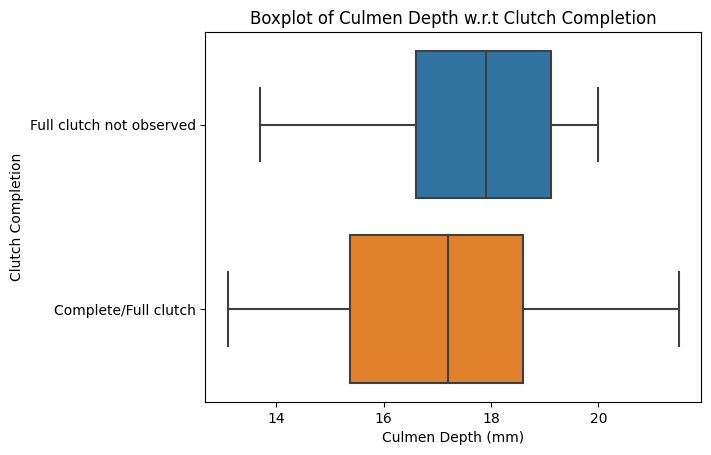

In [62]:
# boxplot of Culmen Depth against Clutch Completion
sns.boxplot(data=penguin_data, x="Culmen Depth (mm)", y="Clutch Completion", orient="h")#
plt.title("Boxplot of Culmen Depth w.r.t Clutch Completion")
plt.yticks(ticks=[0, 1], labels=["Full clutch not observed", "Complete/Full clutch"]);

It can be observed that the culmen depth distribution for non-full and full clutch observations are similar but complete clutch observations have a larger spread in the distribution, i.e, there is a positive correlation with lower culmen depth measurements and full clutch observations. So culmen depth can be distinguishing feature for clutch completion, as evident from the following plot.

C:\Users\calvi.000\AppData\Local\Temp\ipykernel_6324\2959652051.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.pointplot(data=penguin_data, y="Culmen Depth (mm)", x="Clutch Completion", ci=False)


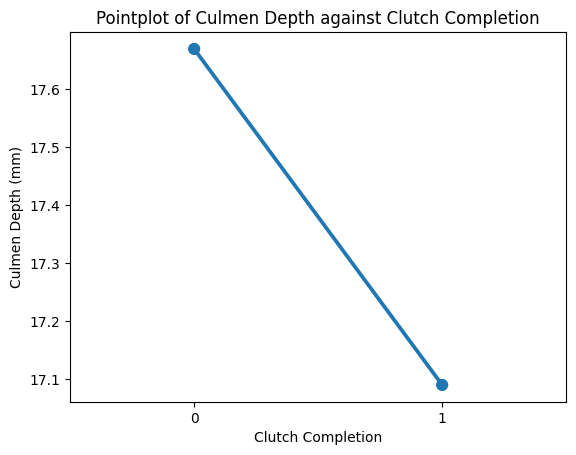

In [63]:
sns.pointplot(data=penguin_data, y="Culmen Depth (mm)", x="Clutch Completion", ci=False)
plt.title("Pointplot of Culmen Depth against Clutch Completion");

### Flipper Length and Clutch Completion

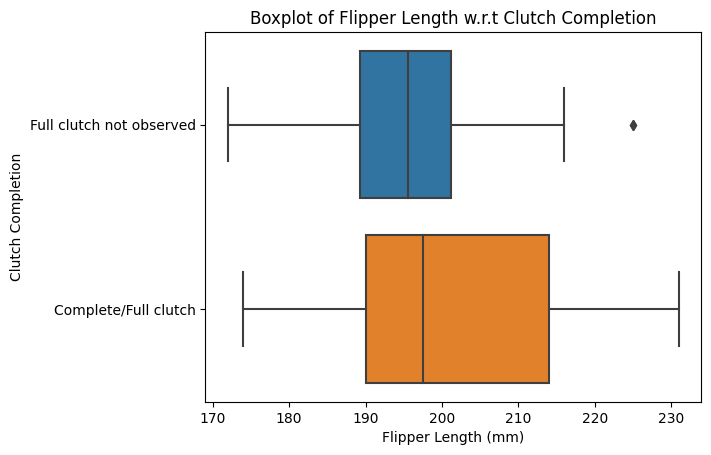

In [64]:
# boxplot of Flipper Length against Clutch Completion
sns.boxplot(data=penguin_data, x="Flipper Length (mm)", y="Clutch Completion", orient="h")
plt.title("Boxplot of Flipper Length w.r.t Clutch Completion")
plt.yticks(ticks=[0, 1], labels=["Full clutch not observed", "Complete/Full clutch"]);

It can be observed that the Flipper length distribution for non-full and full clutch observations are similar but complete clutch observations have a larger spread in the distribution, i.e, there is a positive correlation with higher flipper length measurements and full clutch observations. So flipper length can be distinguishing feature for clutch completion, as evident from the following plot.

C:\Users\calvi.000\AppData\Local\Temp\ipykernel_6324\2203301793.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.pointplot(data=penguin_data, y="Flipper Length (mm)", x="Clutch Completion", ci=False)


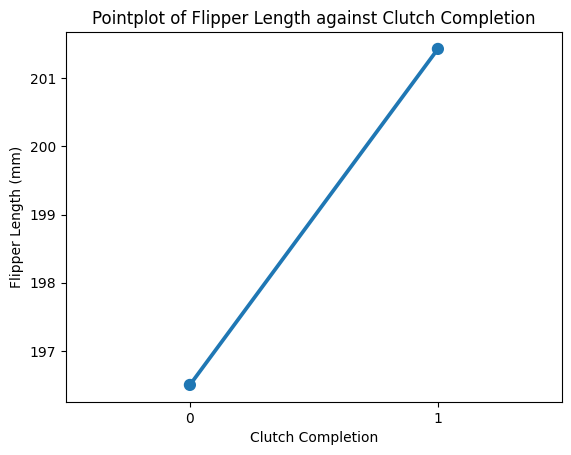

In [65]:
sns.pointplot(data=penguin_data, y="Flipper Length (mm)", x="Clutch Completion", ci=False)
plt.title("Pointplot of Flipper Length against Clutch Completion");

### Body Mass and Clutch Completion

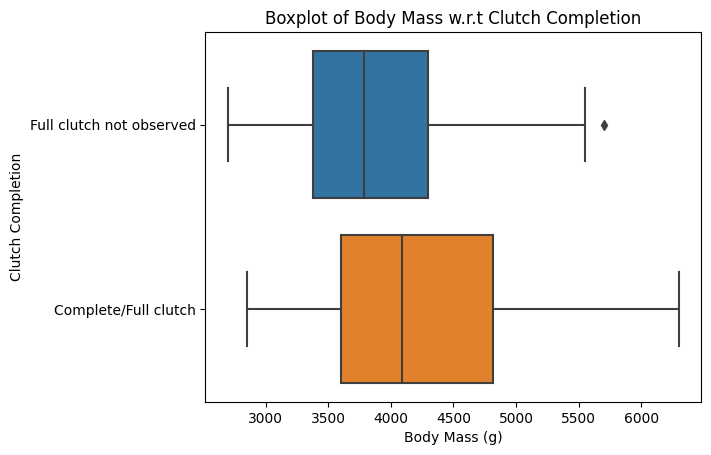

In [66]:
# boxplot of Body Mass against Clutch Completion
sns.boxplot(data=penguin_data, x="Body Mass (g)", y="Clutch Completion", orient="h")#
plt.title("Boxplot of Body Mass w.r.t Clutch Completion")
plt.yticks(ticks=[0, 1], labels=["Full clutch not observed", "Complete/Full clutch"]);

It can be observed that the Body mass distribution for non-full and full clutch observations are similar but complete clutch observations have a larger spread in the distribution, and there is a positive correlation with higher body mass measurements and full clutch observations. So body mass can be distinguishing feature for clutch completion, as evident from the following plot.

C:\Users\calvi.000\AppData\Local\Temp\ipykernel_6324\424850486.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.pointplot(data=penguin_data, y="Body Mass (g)", x="Clutch Completion", ci=False)


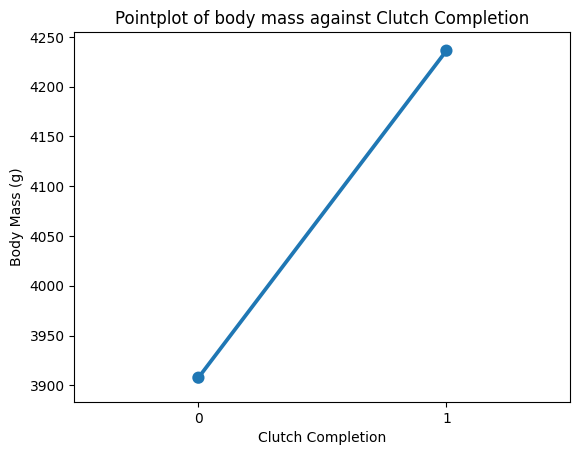

In [67]:
sns.pointplot(data=penguin_data, y="Body Mass (g)", x="Clutch Completion", ci=False)
plt.title("Pointplot of body mass against Clutch Completion");

### Delta 15 N (o/oo) and Clutch Completion

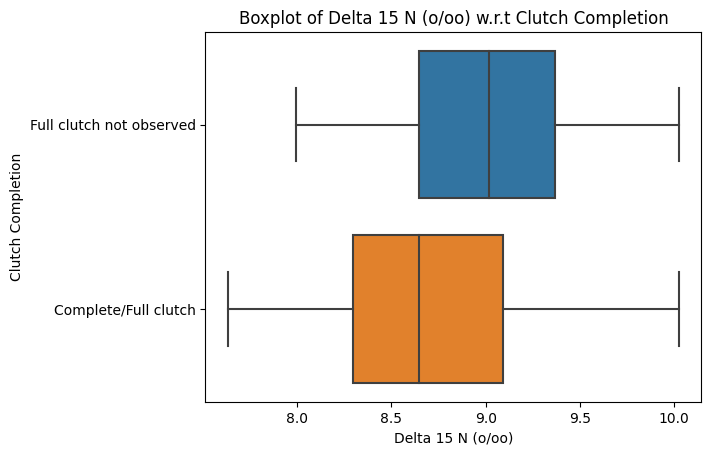

In [68]:
# boxplot of Delta 15 N against Clutch Completion
sns.boxplot(data=penguin_data, x="Delta 15 N (o/oo)", y="Clutch Completion", orient="h")#
plt.title("Boxplot of Delta 15 N (o/oo) w.r.t Clutch Completion")
plt.yticks(ticks=[0, 1], labels=["Full clutch not observed", "Complete/Full clutch"]);

It can be observed that the Delta 15 N (o/oo) distribution for non-full and full clutch observations are similar, but there is a positive correlation with lower Delta 15 N (o/oo) (ratio of stable isotopes 15N:14N) measurements and full clutch observations. So the ratio of stable isotopes can be distinguishing feature for clutch completion, as evident from the following plot.

C:\Users\calvi.000\AppData\Local\Temp\ipykernel_6324\851853944.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.pointplot(data=penguin_data, y="Delta 15 N (o/oo)", x="Clutch Completion", ci=False)


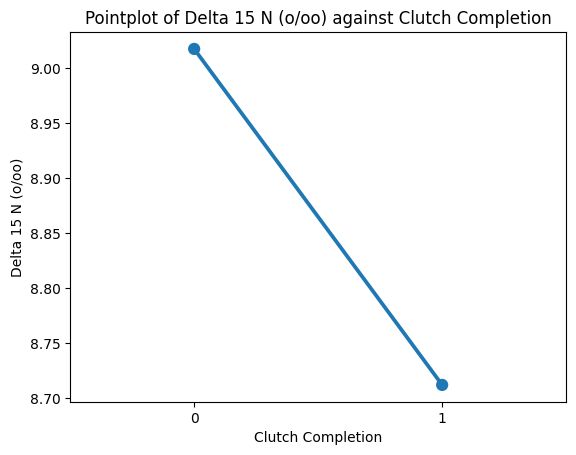

In [69]:
sns.pointplot(data=penguin_data, y="Delta 15 N (o/oo)", x="Clutch Completion", ci=False)
plt.title("Pointplot of Delta 15 N (o/oo) against Clutch Completion");

### Delta 13 C (o/oo) and Clutch Completion

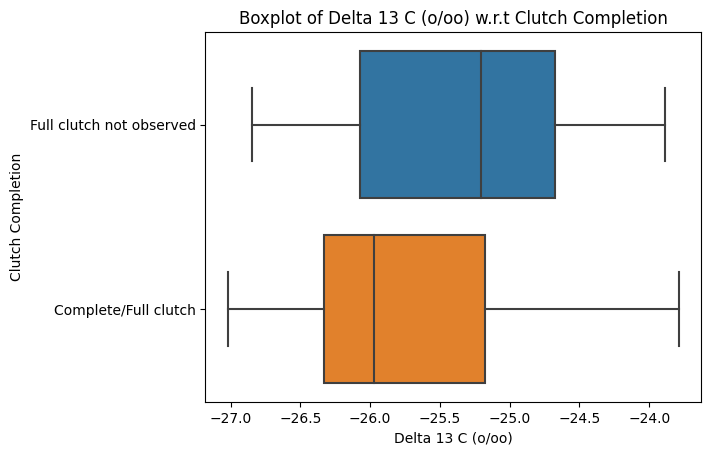

In [70]:
# boxplot of Delta 13 C against Clutch Completion
sns.boxplot(data=penguin_data, x="Delta 13 C (o/oo)", y="Clutch Completion", orient="h")#
plt.title("Boxplot of Delta 13 C (o/oo) w.r.t Clutch Completion")
plt.yticks(ticks=[0, 1], labels=["Full clutch not observed", "Complete/Full clutch"]);

It can be observed that the Delta 13 C (o/oo) distribution for non-full and full clutch observations are similar, but there is a positive correlation with lower Delta 13 C (o/oo) (ratio of stable isotopes 13C:12C) measurements and full clutch observations. So the ratio of stable isotopes can be distinguishing feature for clutch completion, as evident from the following plot.

C:\Users\calvi.000\AppData\Local\Temp\ipykernel_6324\2375707581.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.pointplot(data=penguin_data, y="Delta 13 C (o/oo)", x="Clutch Completion", ci=False)


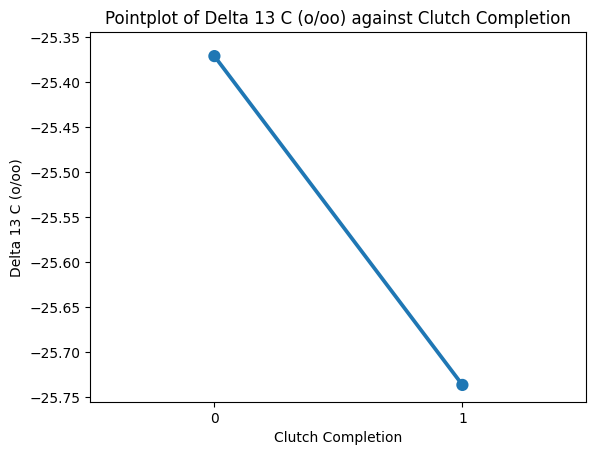

In [71]:
sns.pointplot(data=penguin_data, y="Delta 13 C (o/oo)", x="Clutch Completion", ci=False)
plt.title("Pointplot of Delta 13 C (o/oo) against Clutch Completion");

### Species and Clutch Completion

In [72]:
# set precision
pd.set_option("display.precision", 2)

# extract clutch completion rate of the penguins in the dataset
clutch_completion_rate = penguin_data.groupby("Clutch Completion")["Clutch Completion"].count() / penguin_data.shape[0]
clutch_completion_rate

Clutch Completion
0    0.1
1    0.9
Name: Clutch Completion, dtype: float64

It can be observed that about 90% percent of the penguins sampled in the data were observed with a full clutch by the study nest.

In [73]:
# extract clutch completion rate for each species of the penguins in the dataset
species_clutch_completion_rate = penguin_data.groupby("Species")["Clutch Completion"].mean()
species_clutch_completion_rate

Species
Adelie Penguin (Pygoscelis adeliae)          0.91
Chinstrap penguin (Pygoscelis antarctica)    0.79
Gentoo penguin (Pygoscelis papua)            0.94
Name: Clutch Completion, dtype: float64

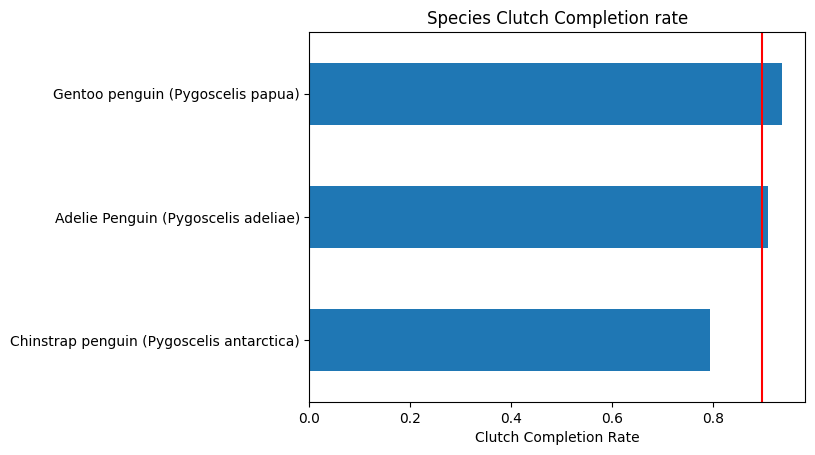

In [74]:
# Make a horizontal bar graph
species_rate_plot = species_clutch_completion_rate.sort_values().plot(kind="barh")
species_rate_plot.axvline(clutch_completion_rate[1], c="red", label="Average Clutch Completion rate of penguins")
species_rate_plot.yaxis.label.set_visible(False)
species_rate_plot.set_xlabel("Clutch Completion Rate")
species_rate_plot.set_title("Species Clutch Completion rate");

It can be observed that the only 2 species of penguin: 'Gentoo Penguin' and 'Adelie Penguin' have a clutch completion rate above the average clutch completion rate for penguins.

### Sex and Clutch Completion

In [75]:
# extract clutch completion rate of each sex of the penguins in the dataset
sex_clutch_completion_rate = penguin_data.groupby("Sex")["Clutch Completion"].mean()
sex_clutch_completion_rate

Sex
FEMALE    0.89
MALE      0.90
Name: Clutch Completion, dtype: float64

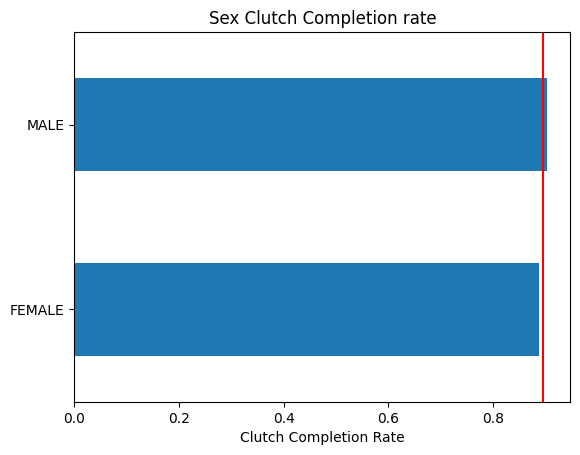

In [76]:
# Make a horizontal bar graph
sex_rate_plot = sex_clutch_completion_rate.sort_values().plot(kind="barh")
sex_rate_plot.axvline(clutch_completion_rate[1], c="red", label="Average Clutch Completion rate of Penguins")
sex_rate_plot.yaxis.label.set_visible(False)
sex_rate_plot.set_xlabel("Clutch Completion Rate")
sex_rate_plot.set_title("Sex Clutch Completion rate");

It can be observed that 'Male' has a slightly higher clutch completion rate than the average penguin clutch completion rate, while 'Female' has slighly lower clutch completion rate than the average rate.

### Species and Culmen Length

In [77]:
# extract the average culmen length of the penguins in the dataset
average_culmen_length = penguin_data["Culmen Length (mm)"].mean()
average_culmen_length

43.92238372093023

In [78]:
# extract the average culmen length of each species of the penguins in the dataset
species_culmen_length = penguin_data.groupby("Species")["Culmen Length (mm)"].mean()
species_culmen_length

Species
Adelie Penguin (Pygoscelis adeliae)          38.83
Chinstrap penguin (Pygoscelis antarctica)    48.83
Gentoo penguin (Pygoscelis papua)            47.48
Name: Culmen Length (mm), dtype: float64

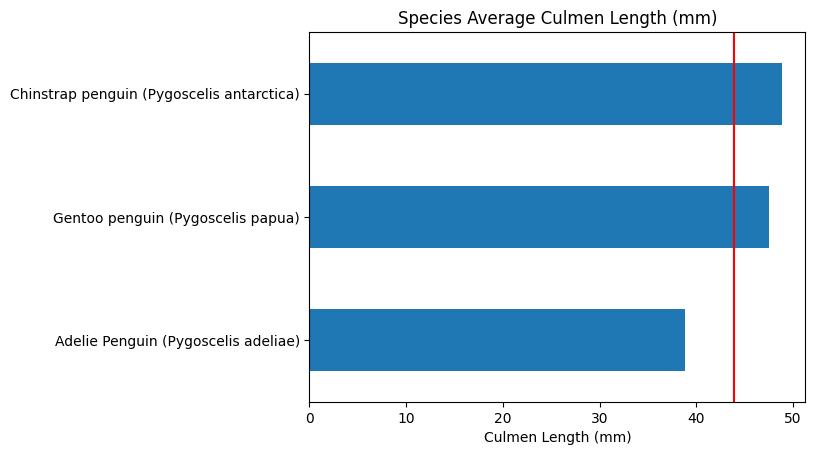

In [79]:
# Make a horizontal bar graph
species_culmen_length_plot = species_culmen_length.sort_values().plot(kind="barh")
species_culmen_length_plot.axvline(average_culmen_length, c="red", label="Culmen Length average for penguins")
species_culmen_length_plot.yaxis.label.set_visible(False)
species_culmen_length_plot.set_xlabel("Culmen Length (mm)")
species_culmen_length_plot.set_title("Species Average Culmen Length (mm)");

It can be observed that only 2 species ('Chinstrap penguin' and 'Gentoo penguin) of penguins have a higher average/mean culmen length than the penguin culmen length average.

### Species and Culmen Depth

In [80]:
# extract the average culmen Depth of the penguins in the dataset
average_culmen_depth = penguin_data["Culmen Depth (mm)"].mean()
average_culmen_depth

17.15029069767442

In [81]:
# extract the average culmen depth of each species of the penguins in the dataset
species_culmen_depth = penguin_data.groupby("Species")["Culmen Depth (mm)"].mean()
species_culmen_depth

Species
Adelie Penguin (Pygoscelis adeliae)          18.34
Chinstrap penguin (Pygoscelis antarctica)    18.42
Gentoo penguin (Pygoscelis papua)            15.00
Name: Culmen Depth (mm), dtype: float64

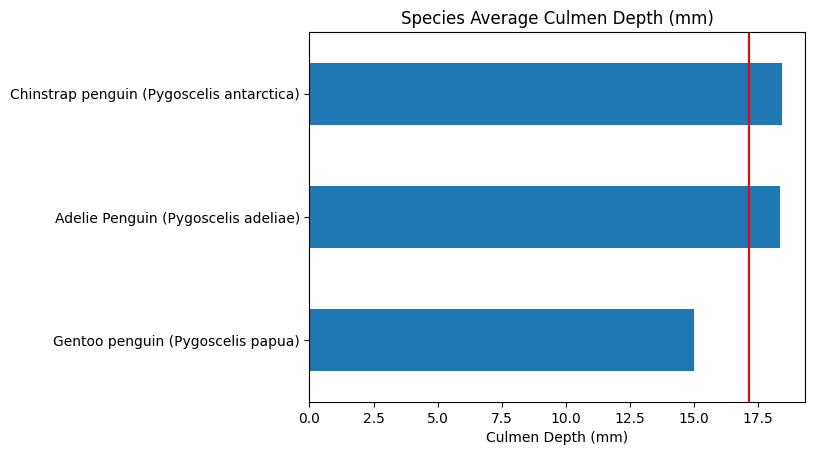

In [82]:
# Make a horizontal bar graph
species_culmen_depth_plot = species_culmen_depth.sort_values().plot(kind="barh")
species_culmen_depth_plot.axvline(average_culmen_depth, c="red", label="Culmen Depht average for penguins")
species_culmen_depth_plot.yaxis.label.set_visible(False)
species_culmen_depth_plot.set_xlabel("Culmen Depth (mm)")
species_culmen_depth_plot.set_title("Species Average Culmen Depth (mm)");

It can be observed that only 2 species ('Chinstrap penguin' and 'Adelie penguin) of penguins have a higher average/mean culmen depth than the penguin culmen depth average.

### Species and Flipper Length

In [83]:
# extract the average flipper length of the penguins in the dataset
average_flipper_length = penguin_data["Flipper Length (mm)"].mean()
average_flipper_length

200.9156976744186

In [84]:
# extract the average flipper lenght of each species of the penguins in the dataset
species_flipper_length = penguin_data.groupby("Species")["Flipper Length (mm)"].mean()
species_flipper_length

Species
Adelie Penguin (Pygoscelis adeliae)          190.03
Chinstrap penguin (Pygoscelis antarctica)    195.82
Gentoo penguin (Pygoscelis papua)            217.06
Name: Flipper Length (mm), dtype: float64

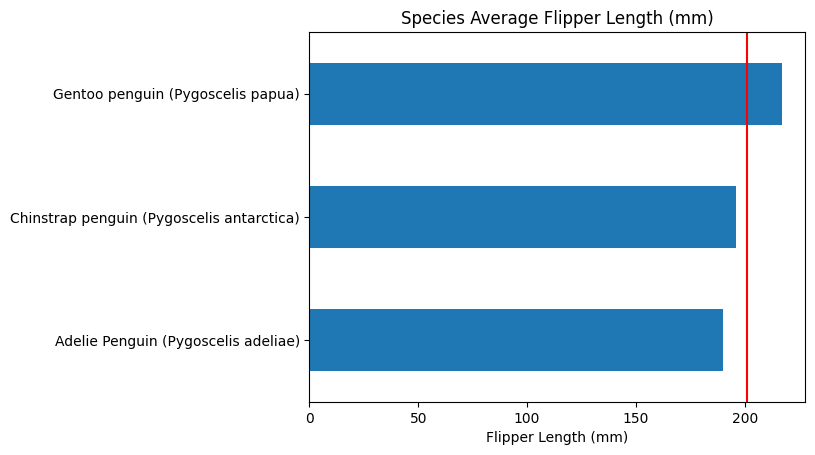

In [85]:
# Make a horizontal bar graph
species_flipper_length_plot = species_flipper_length.sort_values().plot(kind="barh")
species_flipper_length_plot.axvline(average_flipper_length, c="red", label="Flipper Length average for penguins")
species_flipper_length_plot.yaxis.label.set_visible(False)
species_flipper_length_plot.set_xlabel("Flipper Length (mm)")
species_flipper_length_plot.set_title("Species Average Flipper Length (mm)");

It can be observed that only 'Gentoo penguin' species of penguins have a higher average/mean flipper length than the penguin flipper length average.

### Species and Body Mass

In [86]:
# extract the average flipper length of the penguins in the dataset
average_body_mass = penguin_data["Body Mass (g)"].mean()
average_body_mass

4201.7558139534885

In [87]:
# extract the average flipper lenght of each species of the penguins in the dataset
species_body_mass = penguin_data.groupby("Species")["Body Mass (g)"].mean()
species_body_mass

Species
Adelie Penguin (Pygoscelis adeliae)          3703.96
Chinstrap penguin (Pygoscelis antarctica)    3733.09
Gentoo penguin (Pygoscelis papua)            5068.97
Name: Body Mass (g), dtype: float64

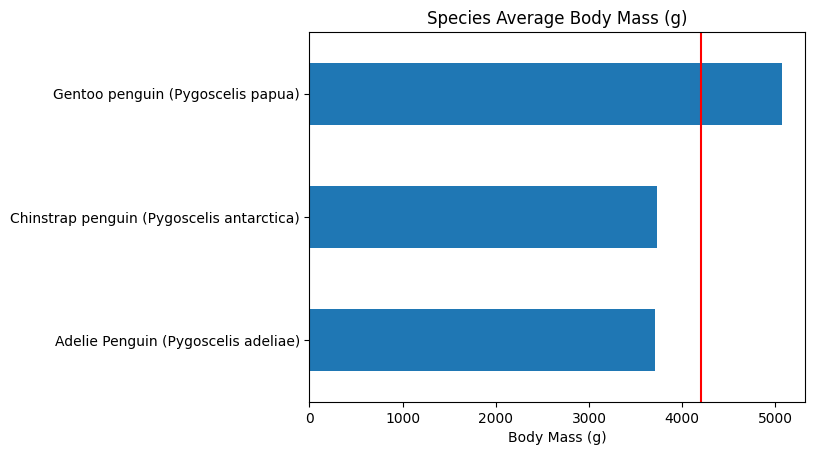

In [88]:
# Make a horizontal bar graph
species_body_mass_plot = species_body_mass.sort_values().plot(kind="barh")
species_body_mass_plot.axvline(average_body_mass, c="red", label="Body Mass average for penguins")
species_body_mass_plot.yaxis.label.set_visible(False)
species_body_mass_plot.set_xlabel("Body Mass (g)")
species_body_mass_plot.set_title("Species Average Body Mass (g)");

It can be observed that only 'Gentoo penguin' species of penguins have a higher average/mean body mass than the penguin body mass average. This is also in alignment with the correlational heatmap produced at the start of the bivariate EDA process, since both body mass and flipper length have strong positive correlation.

### Species and Delta 15 N (o/oo)

In [89]:
# extract the average Delta 15 N (o/oo) of the penguins in the dataset
average_delta15N = penguin_data["Delta 15 N (o/oo)"].mean()
average_delta15N

8.744232441860467

In [90]:
# extract the average flipper lenght of each species of the penguins in the dataset
species_delta15N = penguin_data.groupby("Species")["Delta 15 N (o/oo)"].mean()
species_delta15N

Species
Adelie Penguin (Pygoscelis adeliae)          8.87
Chinstrap penguin (Pygoscelis antarctica)    9.35
Gentoo penguin (Pygoscelis papua)            8.26
Name: Delta 15 N (o/oo), dtype: float64

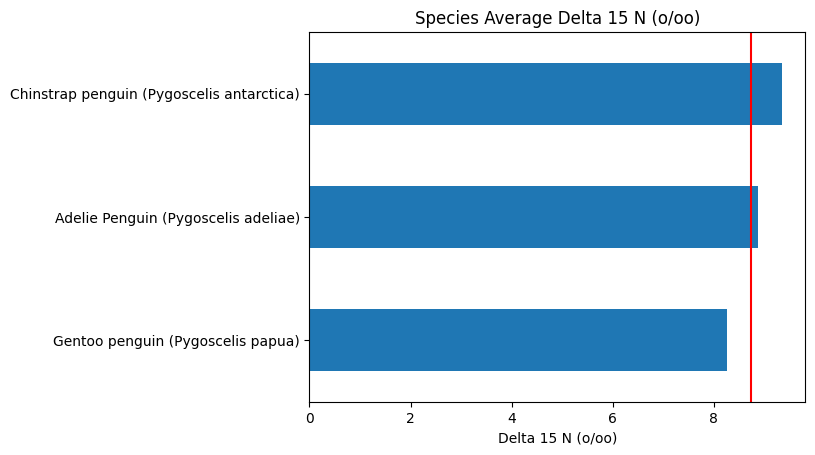

In [91]:
# Make a horizontal bar graph
species_delta15N_plot = species_delta15N.sort_values().plot(kind="barh")
species_delta15N_plot.axvline(average_delta15N, c="red", label="Delta 15 N (o/oo) average for penguins")
species_delta15N_plot.yaxis.label.set_visible(False)
species_delta15N_plot.set_xlabel("Delta 15 N (o/oo)")
species_delta15N_plot.set_title("Species Average Delta 15 N (o/oo)");

It can be observed that only 2 species ('Chinstrap penguin' and 'Adelie penguin) of penguins have a higher average/mean Delta 15 N (o/oo) ( ratio of stable isotopes 15N:14N) than the penguin Delta 15 N (o/oo) average.

### Species and Delta 13 C (o/oo)

In [92]:
# extract the average Delta 15 N (o/oo) of the penguins in the dataset
average_delta13C = penguin_data["Delta 13 C (o/oo)"].mean()
average_delta13C

-25.698146802325578

In [93]:
# extract the average flipper lenght of each species of the penguins in the dataset
species_delta13C = penguin_data.groupby("Species")["Delta 13 C (o/oo)"].mean()
species_delta13C

Species
Adelie Penguin (Pygoscelis adeliae)         -25.82
Chinstrap penguin (Pygoscelis antarctica)   -24.55
Gentoo penguin (Pygoscelis papua)           -26.18
Name: Delta 13 C (o/oo), dtype: float64

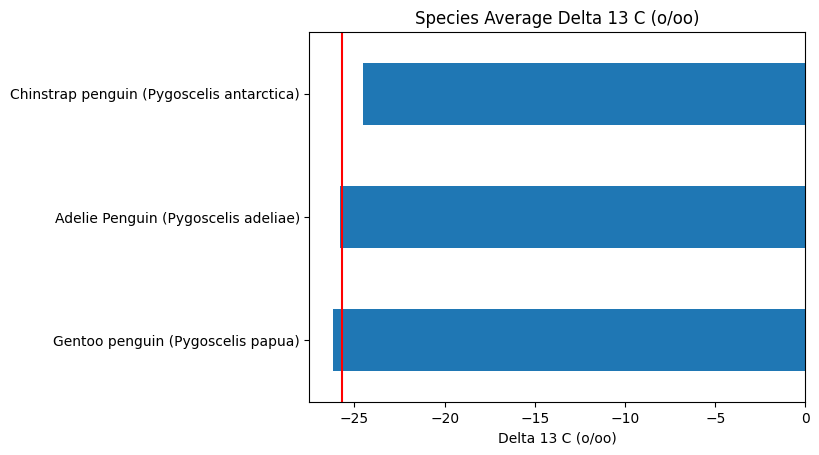

In [94]:
# Make a horizontal bar graph
species_delta13C_plot = species_delta13C.sort_values().plot(kind="barh")
species_delta13C_plot.axvline(average_delta13C, c="red", label="Delta 13 C (o/oo) average for penguins")
species_delta13C_plot.yaxis.label.set_visible(False)
species_delta13C_plot.set_xlabel("Delta 13 C (o/oo)")
species_delta13C_plot.set_title("Species Average Delta 13 C (o/oo)");

It can be observed that only 'Gentoo Penguin' species of penguins have a lower average/mean Delta 13 C (o/oo) ( ratio of stable isotopes 13C:12C) than the penguin Delta 13 C (o/oo) average.

### Species and Sex

<Axes: title={'center': 'Distribution of Sex in Chinstrap penguin species'}, ylabel='count'>

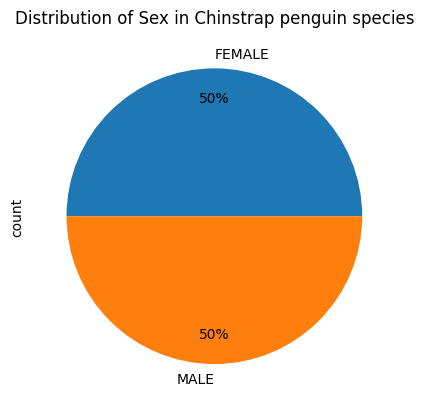

In [95]:
# Extract the indices of the different species of penguins in the dataset
chinstrap_indices = penguin_data.loc[penguin_data["Species"] == "Chinstrap penguin (Pygoscelis antarctica)", "Species"].index
gentoo_indices = penguin_data.loc[penguin_data["Species"] == "Gentoo penguin (Pygoscelis papua)", "Species"].index
adelie_indices = penguin_data.loc[penguin_data["Species"] == "Adelie Penguin (Pygoscelis adeliae)", "Species"].index

# Check sex distribution in the species
chinstrap_sex = penguin_data.loc[chinstrap_indices, "Sex"]
chinstrap_sex_distribution = chinstrap_sex.value_counts()
chinstrap_sex_distribution.plot.pie(autopct='%1.0f%%', pctdistance=0.8, radius=1, 
                                    title="Distribution of Sex in Chinstrap penguin species")

<Axes: title={'center': 'Distribution of Sex in Gentoo penguin species'}, ylabel='count'>

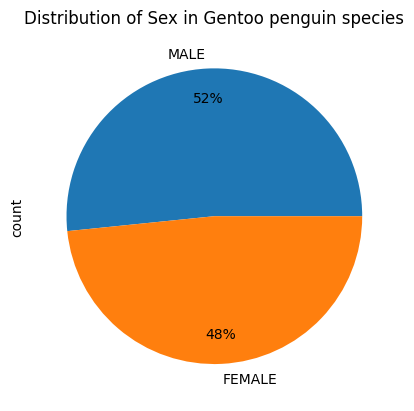

In [96]:
# Check sex distribution in the species
gentoo_sex = penguin_data.loc[gentoo_indices, "Sex"]
gentoo_sex_distribution = gentoo_sex.value_counts()
gentoo_sex_distribution.plot.pie(autopct='%1.0f%%', pctdistance=0.8, radius=1, 
                                 title="Distribution of Sex in Gentoo penguin species")

<Axes: title={'center': 'Distribution of Sex in Adelie penguin species'}, ylabel='count'>

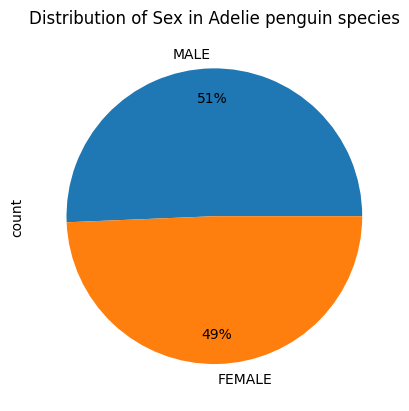

In [97]:
# Check sex distribution in the species
adelie_sex = penguin_data.loc[adelie_indices, "Sex"]
adelie_sex_distribution = adelie_sex.value_counts()
adelie_sex_distribution.plot.pie(autopct='%1.0f%%', pctdistance=0.8, radius=1, 
                                 title="Distribution of Sex in Adelie penguin species")

It can be observed that there is a nearly even distribution among males and females in all the species of penguins sampled in the dataset.

# Task 3: Mean & Standard Deviation of the Measurements for each Penguin Species

- Report findings in a table
- Comment on differences between the species

In [98]:
# List of numerical columns in the dataset
numerical_cols = ["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)", 
                  "Delta 15 N (o/oo)", "Delta 13 C (o/oo)"]

# Extract the mean measurements for each penguin species
species_mean_measurements = penguin_data.groupby("Species")[numerical_cols].mean()

# Replacement values for the column names
mean_col_replacement = {'Culmen Length (mm)': "Culmen Length Mean (mm)", 'Culmen Depth (mm)': "Culmen Depth Mean (mm)",
                       'Flipper Length (mm)': "Flipper Length Mean (mm)", 'Body Mass (g)': "Body Mass Mean (g)", 
                        'Delta 15 N (o/oo)': "Delta 15 N (o/oo) Mean", 'Delta 13 C (o/oo)': "Delta 13 C (o/oo) Mean"
                       }

# Rename the columns
species_mean_measurements.rename(columns = mean_col_replacement, inplace = True)

# Check whether the columns have updated
species_mean_measurements

,Culmen Length Mean (mm),Culmen Depth Mean (mm),Flipper Length Mean (mm),Body Mass Mean (g),Delta 15 N (o/oo) Mean,Delta 13 C (o/oo) Mean
Species,,,,,,
Adelie Penguin (Pygoscelis adeliae),38.83,18.34,190.03,3703.96,8.87,-25.82
Chinstrap penguin (Pygoscelis antarctica),48.83,18.42,195.82,3733.09,9.35,-24.55
Gentoo penguin (Pygoscelis papua),47.48,15.00,217.06,5068.97,8.26,-26.18


In [143]:
# extract the standard deviation of the measurements for each penguin species
species_standard_deviation_measurements = penguin_data.groupby("Species")[numerical_cols].std()

# Replacement values for the column names
std_col_replacement = {'Culmen Length (mm)': "Culmen Length STD (mm)", 'Culmen Depth (mm)': "Culmen Depth STD (mm)",
                       'Flipper Length (mm)': "Flipper Length STD (mm)", 'Body Mass (g)': "Body Mass STD (g)", 
                        'Delta 15 N (o/oo)': "Delta 15 N (o/oo) STD", 'Delta 13 C (o/oo)': "Delta 13 C (o/oo) STD"
                       }

# Rename the columns
species_standard_deviation_measurements.rename(columns = std_col_replacement, inplace = True)

# Check whether the columns have updated
species_standard_deviation_measurements

,Culmen Length STD (mm),Culmen Depth STD (mm),Flipper Length STD (mm),Body Mass STD (g),Delta 15 N (o/oo) STD,Delta 13 C (o/oo) STD
Species,,,,,,
Adelie Penguin (Pygoscelis adeliae),2.69,1.22,6.58,458.85,0.41,0.57
Chinstrap penguin (Pygoscelis antarctica),3.34,1.14,7.13,384.34,0.37,0.24
Gentoo penguin (Pygoscelis papua),3.09,0.99,6.62,508.16,0.28,0.53


In [144]:
# Performing an inner join on the mean and standard deviation tables for integration of data
mean_std_data = pd.merge(left=species_mean_measurements, right=species_standard_deviation_measurements,
                        how='inner', on='Species')
# View final version of the table
mean_std_data

,Culmen Length Mean (mm),Culmen Depth Mean (mm),Flipper Length Mean (mm),Body Mass Mean (g),Delta 15 N (o/oo) Mean,Delta 13 C (o/oo) Mean,Culmen Length STD (mm),Culmen Depth STD (mm),Flipper Length STD (mm),Body Mass STD (g),Delta 15 N (o/oo) STD,Delta 13 C (o/oo) STD
Species,,,,,,,,,,,,
Adelie Penguin (Pygoscelis adeliae),38.83,18.34,190.03,3703.96,8.87,-25.82,2.69,1.22,6.58,458.85,0.41,0.57
Chinstrap penguin (Pygoscelis antarctica),48.83,18.42,195.82,3733.09,9.35,-24.55,3.34,1.14,7.13,384.34,0.37,0.24
Gentoo penguin (Pygoscelis papua),47.48,15.00,217.06,5068.97,8.26,-26.18,3.09,0.99,6.62,508.16,0.28,0.53


The dataframe looks like it could be rearranged for a better ease of reading, so let's rearrange it...

In [145]:
# extract the columns
cols = mean_std_data.columns.values
cols

array(['Culmen Length Mean (mm)', 'Culmen Depth Mean (mm)',
       'Flipper Length Mean (mm)', 'Body Mass Mean (g)',
       'Delta 15 N (o/oo) Mean', 'Delta 13 C (o/oo) Mean',
       'Culmen Length STD (mm)', 'Culmen Depth STD (mm)',
       'Flipper Length STD (mm)', 'Body Mass STD (g)',
       'Delta 15 N (o/oo) STD', 'Delta 13 C (o/oo) STD'], dtype=object)

In [146]:
new_order_cols = ['Culmen Length Mean (mm)', 'Culmen Length STD (mm)', 'Culmen Depth Mean (mm)', 'Culmen Depth STD (mm)',
                 'Flipper Length Mean (mm)', 'Flipper Length STD (mm)', 'Body Mass Mean (g)', 'Body Mass STD (g)',
                 'Delta 15 N (o/oo) Mean', 'Delta 15 N (o/oo) STD', 'Delta 13 C (o/oo) Mean', 'Delta 13 C (o/oo) STD']
mean_std_data = mean_std_data[new_order_cols]
mean_std_data

,Culmen Length Mean (mm),Culmen Length STD (mm),Culmen Depth Mean (mm),Culmen Depth STD (mm),Flipper Length Mean (mm),Flipper Length STD (mm),Body Mass Mean (g),Body Mass STD (g),Delta 15 N (o/oo) Mean,Delta 15 N (o/oo) STD,Delta 13 C (o/oo) Mean,Delta 13 C (o/oo) STD
Species,,,,,,,,,,,,
Adelie Penguin (Pygoscelis adeliae),38.83,2.69,18.34,1.22,190.03,6.58,3703.96,458.85,8.87,0.41,-25.82,0.57
Chinstrap penguin (Pygoscelis antarctica),48.83,3.34,18.42,1.14,195.82,7.13,3733.09,384.34,9.35,0.37,-24.55,0.24
Gentoo penguin (Pygoscelis papua),47.48,3.09,15.00,0.99,217.06,6.62,5068.97,508.16,8.26,0.28,-26.18,0.53


### Comments

- **Adelie penguin (Pygoscelis adeliae):** <br> From the final table, we can see that the mean value of culmen length for the     species much shorter than the   other species, approximately 10mm shorter. This species also has the lowest mean body mass     (3703.96g). <br>
- **Gentoo penguin (Pygoscelis papua):** <br> It can be observed that the  species have a shorter culmen depth on average when   compared with the other species, approximately 3mm shorter. We also find that the species has a longer flipper length on       average in comparison to the   other species, approximately 22mm longer. It can also be observed that the species has the       highest mean body mass (5068.97g).
- **Chinstrap penguin (Pygoscelis antarctica)** <br>	The `Chinstrap Penguin` species has the highest Delta 15 N Mean value of 9.35(o/oo) as well as the lowest Delta 13 C Mean       value of -24.55(o/oo). 

It also important to note that these insights are in alignment with the results we found in the EDA section.

# Task 4: Correlations Among Numerical Columns for each Species 

- Produce visualizations for the correlations
- Explain results

In [147]:
# Extract the numerical columns for the chinstrap penguin species
chinstrap_numerical_cols = penguin_data.loc[chinstrap_indices, numerical_cols]

# Correlational Heatmap among numerical columns for Chinstrap penguin species
chinstrap_numerical_cols.corr().style.background_gradient(cmap='YlOrRd')

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Culmen Length (mm),1.000000,0.653536,0.471607,0.513638,0.152768,0.162862
Culmen Depth (mm),0.653536,1.000000,0.580143,0.604498,0.101949,0.137349
Flipper Length (mm),0.471607,0.580143,1.000000,0.641559,0.258151,0.185342
Body Mass (g),0.513638,0.604498,0.641559,1.000000,-0.037349,0.043149
Delta 15 N (o/oo),0.152768,0.101949,0.258151,-0.037349,1.000000,-0.180725
Delta 13 C (o/oo),0.162862,0.137349,0.185342,0.043149,-0.180725,1.000000


The values in the correlational heatmap represents the strength of the relation and it is standardized,i.e., values ranges between -1 to +1. Variables are strongly  correlated when the value is close to +ve 1 (positive correlation) or -ve 1 (negative correlation). 0 indicates no relation among them.

It is noted that based on colors of the heatmap, the columns `Culmen Length`, `Culmen Depth`, `Flipper Length`, and `Body Mass` columns have a good positive correlation with each other. In other words, higher culmen length (or any one of culmen depth, flipper length, and body mass) has a good chance of indicating higher culmen length, culmen depth, flipper length, and body mass for the 'Chinstrap penguin' species.

In [148]:
# Extract the numerical columns for the gentoo penguin species
gentoo_numerical_cols = penguin_data.loc[gentoo_indices, numerical_cols]

# Correlational Heatmap among numerical columns for Gentoo penguin species
gentoo_numerical_cols.corr().style.background_gradient(cmap='YlOrRd')

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Culmen Length (mm),1.000000,0.610700,0.664061,0.673443,0.109268,0.019297
Culmen Depth (mm),0.610700,1.000000,0.637730,0.670385,0.239115,-0.063795
Flipper Length (mm),0.664061,0.637730,1.000000,0.711207,0.236984,-0.097112
Body Mass (g),0.673443,0.670385,0.711207,1.000000,0.107065,0.079046
Delta 15 N (o/oo),0.109268,0.239115,0.236984,0.107065,1.000000,-0.534002
Delta 13 C (o/oo),0.019297,-0.063795,-0.097112,0.079046,-0.534002,1.000000


It is noted that based on colors of the heatmap, the columns `Culmen Length`, `Culmen Depth`, `Flipper Length`, and `Body Mass` columns have a strong positive correlation with each other.
In other words, higher culmen length (or any one of culmen depth, flipper length, and body mass) indicates higher culmen length, culmen depth, flipper length, and body mass for the 'Gentoo penguin' species. It is also interesting to see that the strength of this correlation is much stronger than in the 'Chinstrap penguin' species.

In [149]:
# Extract the numerical columns for the Adelie penguin species
adelie_numerical_cols = penguin_data.loc[adelie_indices, numerical_cols]

# Correlational Heatmap among numerical columns for Adelie penguin species
adelie_numerical_cols.corr().style.background_gradient(cmap='YlOrRd')

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Culmen Length (mm),1.000000,0.370970,0.340143,0.553840,0.089614,0.037491
Culmen Depth (mm),0.370970,1.000000,0.291311,0.563609,0.073850,0.132344
Flipper Length (mm),0.340143,0.291311,1.000000,0.474084,-0.070989,-0.251192
Body Mass (g),0.553840,0.563609,0.474084,1.000000,-0.006617,-0.019919
Delta 15 N (o/oo),0.089614,0.073850,-0.070989,-0.006617,1.000000,0.495972
Delta 13 C (o/oo),0.037491,0.132344,-0.251192,-0.019919,0.495972,1.000000


It is noted that based on colors of the heatmap, the columns `Culmen Length`, `Culmen Depth`, `Flipper Length`, and `Body Mass` columns have a considerable positive correlation with each other. In other words, higher culmen length (or any one of culmen depth, flipper length, and body mass) has a considerable chance of indicating higher culmen length, culmen depth, flipper length, and body mass for the 'Adelie penguin' species. It is also interesting to see that the strength of this correlation is weaker than in the 'Chinstrap penguin' species. <br> <br>
We also see that unlike in the other 2 species, the 'Adelie penguin' species has a good positive correlation among the `Delta 15 N (o/oo)` and `Delta 13 C (o/oo)` columns, i.e., higher `Delta 15 N (o/oo)` values has a good chance in indicating higher `Delta 13 C (o/oo)` in the 'Adelie penguin' species. <br> <br>

*We note that since `Culmen Length`, `Culmen Depth`, `Flipper Length`, and `Body Mass` columns have atleast a notable positive correlation with each other across all the species, we expect that the penguins sampled in the dataset will also have a noteable positve correlation across these columns regardless of the type of penguin species.*

In [110]:
# Correlational Heatmap of penguins regardless of species
numeric_data = penguin_data[numerical_cols]
numeric_data.corr().style.background_gradient(cmap='YlOrRd')

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Culmen Length (mm),1.000000,-0.235055,0.656181,0.595109,-0.069123,0.195853
Culmen Depth (mm),-0.235055,1.000000,-0.583844,-0.471908,0.604201,0.415401
Flipper Length (mm),0.656181,-0.583844,1.000000,0.871202,-0.506267,-0.354568
Body Mass (g),0.595109,-0.471908,0.871202,1.000000,-0.536251,-0.361991
Delta 15 N (o/oo),-0.069123,0.604201,-0.506267,-0.536251,1.000000,0.557609
Delta 13 C (o/oo),0.195853,0.415401,-0.354568,-0.361991,0.557609,1.000000


Our prior hypothesis turns out to be only partially true. It can be observed that columns `Flipper Length` and `Body Mass` have very strong correlation with each other, i.e., higher flipper length indicates higher body mass. <br>
`Culmen Length` column also has a strong correlation with both `Flipper Length` and `Body Mass` columns, meaning higher culmen length indicates higher flipper length as well as higher body mass.<br> <br>
`Culmen Depth` column however, doesn't have a good positive correlation with any of `Culmen Length`, `Flipper Length`, and `Body Mass` columns.

Turns out we just accidentaly identified a case of Simpson's Paradox!

# Task 5: K-Means Clustering

Comment on:
- chosen number of clusters
- possible limitations
- any and all uncertainties of the results
- Do the results agree with what was observed in EDA?

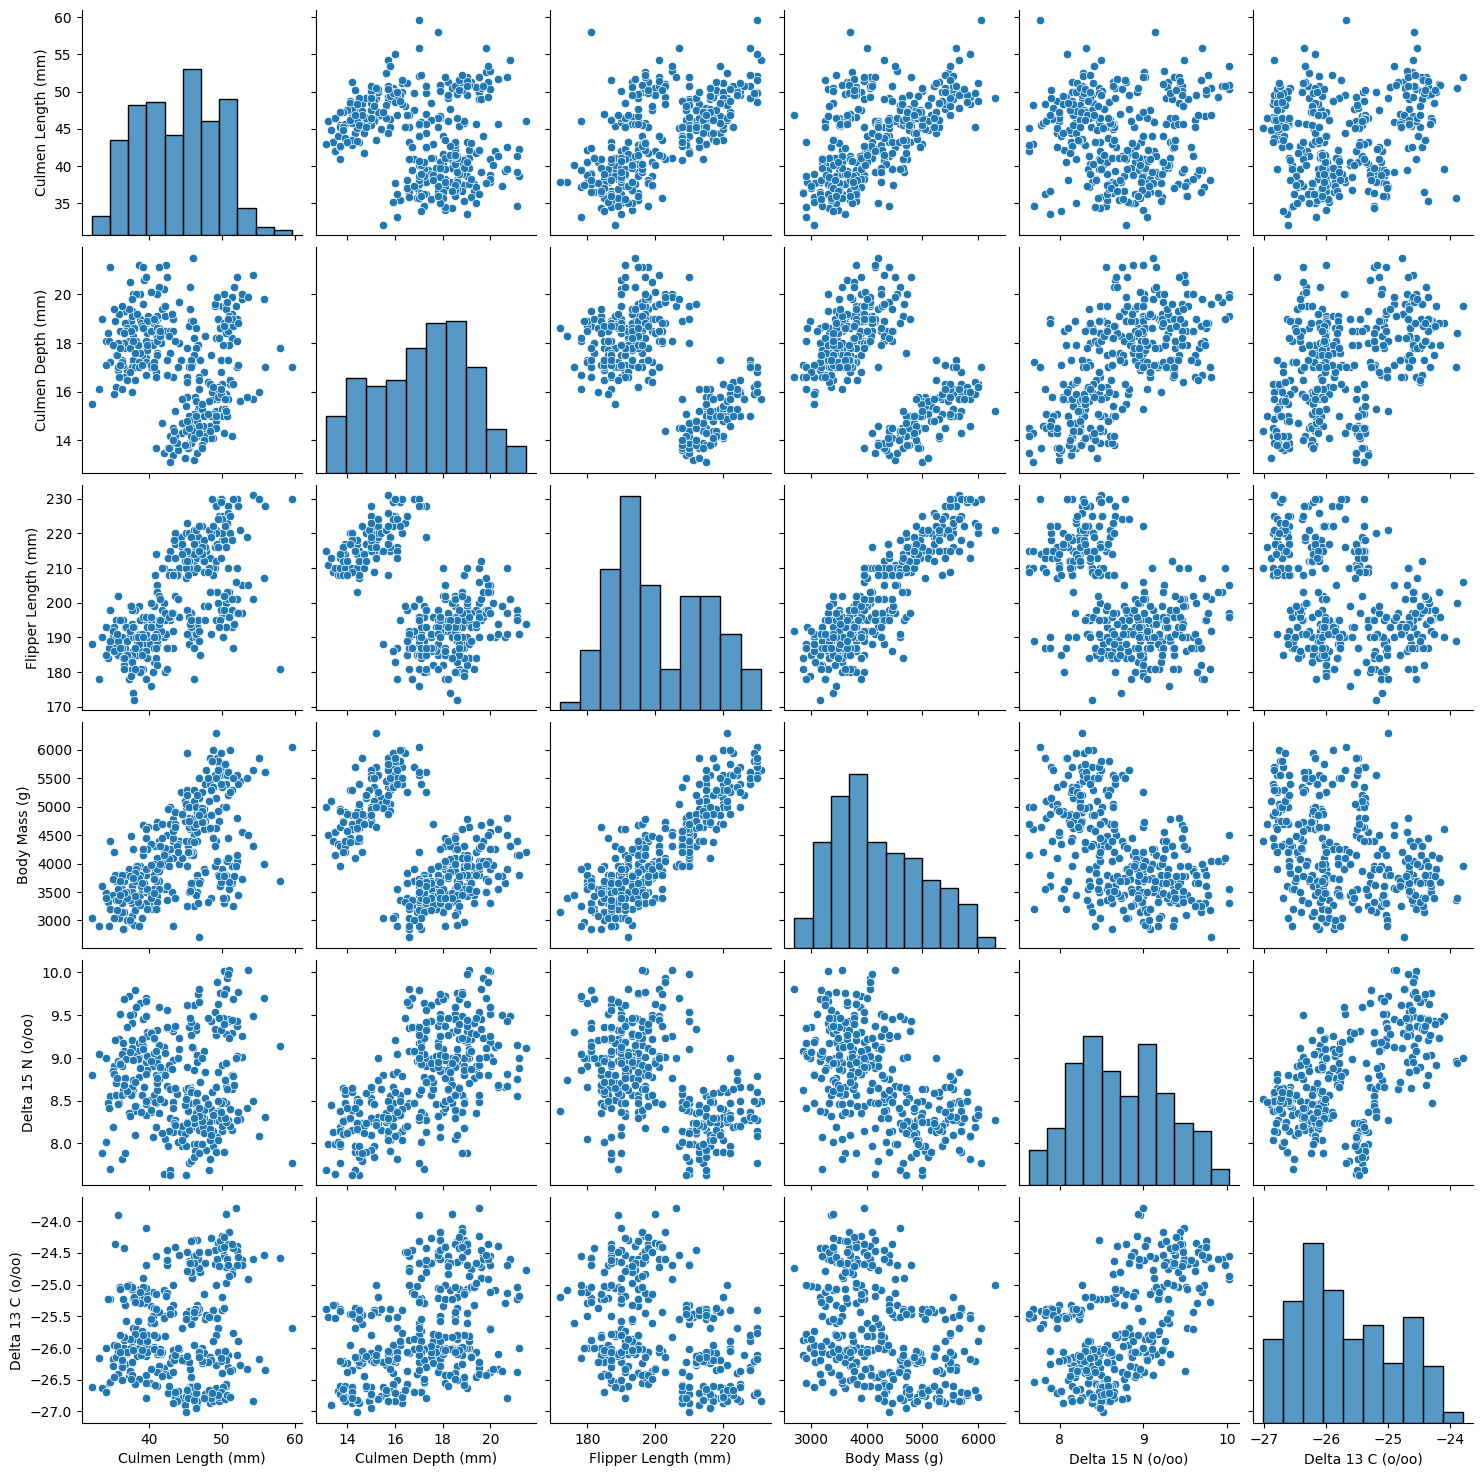

In [111]:
# Pair plots of the numeric data
sns.pairplot(numeric_data)

From the above plots, we see that only the following plots (pairs of variables) have a clear grouping of their data points (or atleast from my visual perspective) based on a rough visual interpretation: 
- `Culmen Depth` & `Flipper Length`
- `Culmen Depth` & `Body Mass`, and 
- `Flipper Length` & `Delta 15 N (o/oo)` 
<br>

These scatter plots seem to have an easy to recognize separation of their data points into 2 groups...

## Culmen Depth & Flipper Length

### Method 1: Using sklearn Library 
<br> <br>
*We will be choosing a cluster number of 2 since we can see from the prior pairplots that there are 2 clear groupings of the data points for columns 'Culmen Depth' & 'Flipper Length'.*

C:\Users\calvi.000\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\calvi.000\AppData\Local\Temp\ipykernel_6324\804579492.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depth_flipper_data["cluster_labels"] = k_means.labels_


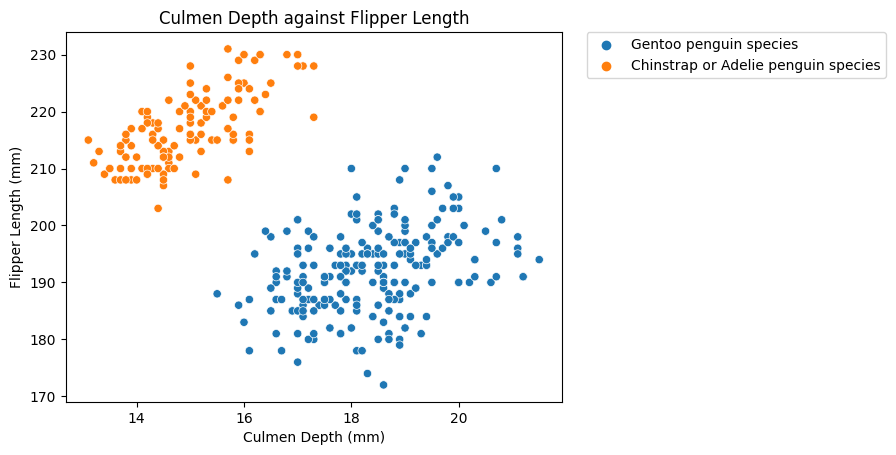

In [112]:
depth_flipper_data = numeric_data[["Culmen Depth (mm)", "Flipper Length (mm)"]]

# scale the data using minmax scale
scaled_data = minmax_scale(depth_flipper_data)

# initialize KMeans object with number of desired clusters:
# We will be choosing a cluster number of 2 since we can see from the prior pairplots that 
# that there are 2 clear groupings of the data points for columns 'Culmen Depth' & 'Flipper Length'.
k_means = KMeans(n_clusters=2)

# fit and transform k_means object to scaled data
k_means.fit_transform(scaled_data)

# extract cluster labels
my_dict = {0: "Chinstrap or Adelie penguin species", 1: "Gentoo penguin species"}
k_means.labels_ = [my_dict[i] for i in k_means.labels_]
depth_flipper_data["cluster_labels"] = k_means.labels_

# plot the clusters
sns.scatterplot(data=depth_flipper_data, x="Culmen Depth (mm)", y="Flipper Length (mm)", hue="cluster_labels")
plt.title("Culmen Depth against Flipper Length")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

The above result is in agreement with the results obtained in the EDA section where we found that only the "Gentoo penguin" species have an average flipper length above 200mm. This is evident from the above clustering of the data points as the data points in orange are primarily addressing the "Gentoo penguin" species since they tend to have flipper length values above 200mm. We see that their culmen depth tends to be lower than the other species, which is also in agreement with the EDA results where we found that only the "Chinstrap penguin" and "Adelie penguin" species had an average culmen depth higher than 17.5mm, i.e., only the "Gentoo penguin" species has a mean culmen depth lower than 17.5mm.

<br>

*Uncertainties: These inferences are made based on the mean values of the measurements  for the different species, found in the EDA section. Hence, it is likely that some of the orange data points could be addressing some other species of penguin that is not Gentoo, but it is expected that most of the orange data points are Gentoo based on the inferences made in EDA.*

### Method 2: Using Lloyd's algorithm 

<b>Step 1 : </b> Decide on the number of clusters k to group objects into

In [113]:
# We will be choosing a cluster number of 2 since we can see from the prior pairplots that 
# there are 2 clear groupings of the data points for columns 'Culmen Depth' & 'Flipper Length'.
K=2

<b> Step 2 : </b> K centroids are randomly assigned

In [114]:
# Step 2 : Select random observation as centroids
Centroids = (numeric_data.sample(n=K))

print("Centroids: ")
print(Centroids)

Centroids: 
     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
285                49.8               16.8                230.0   
61                 41.3               21.1                195.0   

     Body Mass (g)  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
285         5700.0               8.47             -26.69  
61          4400.0               8.75             -26.38  


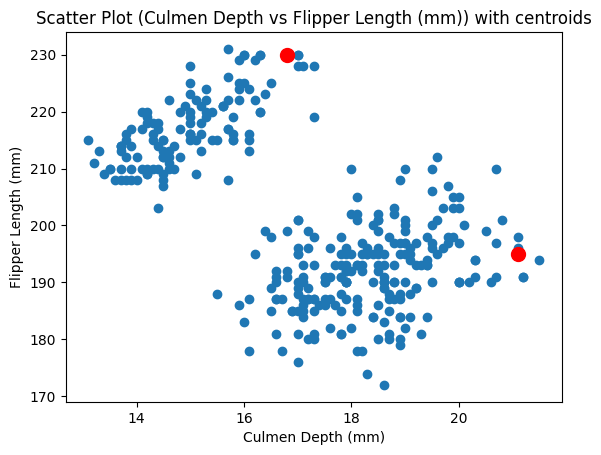

In [115]:
#Visualise data points, red point/observation is the centroids
plt.scatter(numeric_data["Culmen Depth (mm)"], numeric_data["Flipper Length (mm)"])
plt.scatter(Centroids["Culmen Depth (mm)"],Centroids["Flipper Length (mm)"],s = 100,c='red')
plt.xlabel('Culmen Depth (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title("Scatter Plot (Culmen Depth vs Flipper Length (mm)) with centroids")
plt.show()

<b> Step 3 : </b> Calculate the distance between each instance and the center of each cluster

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
61                41.87              18.06               192.17   
285               47.18              15.70               214.79   

     Body Mass (g)  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
61         3660.21               8.98             -25.47  
285        5060.90               8.37             -26.06  


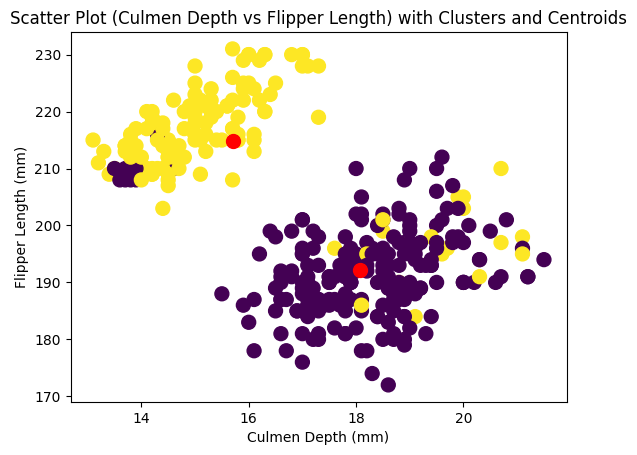

In [116]:
while True:
# function calculates the Euclidean distance between the given single row/observation (obs) and each centroids
# returns the index of the centroids, which this observation belongs to.

    def distance(obs):
        d = np.sqrt(((obs - Centroids) ** 2).sum(axis=1)) # axis = 1, will sum along the row wise
        return d.idxmin() #idxmin() - function returns the index of the centroids, which has minimum distance value.
    
    # Step 4: If the object is closer to the center of another cluster than the one it is currently assigned to, 
    # it is reassigned to the closer cluster
    
    # Apply the function to the entire data set.
    clusters = numeric_data.apply(distance, axis=1)
    
    # Step 5: Recalculate the centroids
    prev_centroids = Centroids
    Centroids = numeric_data.groupby(clusters).mean()
    
    # Step 6: If there is a change in the Centroids dataframe, repeat steps 3-5
    if Centroids.equals(prev_centroids) == True:
        # Plot the cluster assignments.
        clusters = numeric_data.apply(distance, axis=1)
        print(Centroids)
        plt.scatter(numeric_data["Culmen Depth (mm)"],numeric_data["Flipper Length (mm)"],s = 100,c=clusters) 
        plt.scatter(Centroids["Culmen Depth (mm)"],Centroids["Flipper Length (mm)"],s = 100,c='red')
        plt.xlabel('Culmen Depth (mm)')
        plt.ylabel('Flipper Length (mm)')
        plt.title("Scatter Plot (Culmen Depth vs Flipper Length) with Clusters and Centroids")
        plt.show()
        break



Some of the data points don't seem to have updated to the right cluster based on the distance function and by cross-checking with the clustering method using sklearn library...

## Culmen Depth & Body Mass 

### Method 1: Using sklearn Library 
<br> <br>
*We will be choosing a cluster number of 2 since we can see from the prior pairplots that there are 2 clear groupings of the data points for columns 'Culmen Depth' & 'Body Mass'.*

C:\Users\calvi.000\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\calvi.000\AppData\Local\Temp\ipykernel_6324\2999671334.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depth_mass_data["cluster_labels"] = k_means.labels_


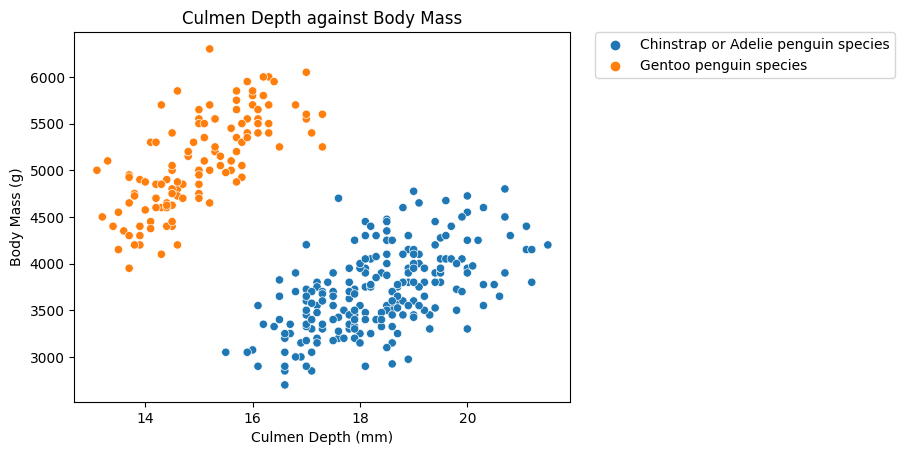

In [117]:
depth_mass_data = numeric_data[["Culmen Depth (mm)", "Body Mass (g)"]]

# scale the data using minmax scale
scaled_data = minmax_scale(depth_mass_data)

# initialize KMeans object with number of desired clusters:
# We will be choosing a cluster number of 2 since we can see from the prior pairplots that 
# that there are 2 clear groupings of the data points for columns 'Culmen Depth' & 'Body Mass'.
k_means = KMeans(n_clusters=2)

# fit and transform k_means object to scaled data
k_means.fit_transform(scaled_data)

# extract cluster labels
my_dict = {0: "Chinstrap or Adelie penguin species", 1: "Gentoo penguin species"}
k_means.labels_ = [my_dict[i] for i in k_means.labels_]
depth_mass_data["cluster_labels"] = k_means.labels_

# plot the clusters
sns.scatterplot(data=depth_mass_data, x="Culmen Depth (mm)", y="Body Mass (g)", hue="cluster_labels")
plt.title("Culmen Depth against Body Mass")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

The above result is in agreement with the results obtained in the EDA section where we found that only the "Gentoo penguin" species have an average body mass above 4201 grams. This is evident from the above clustering of the data points as the data points in orange are primarily addressing the "Gentoo penguin" species, since they tend to have body mass values above 4201 grams. We see that their culmen depth tends to be lower than the other species, which is also in agreement with the EDA results where we found that only the "Chinstrap penguin" and "Adelie penguin" species had an average culmen depth higher than 17.5mm, i.e., only the "Gentoo penguin" species has a mean culmen depth lower than 17.5mm
<br>

*Uncertainties: These inferences are made based on the mean values of the measurements  for the different species, found in the EDA section. Hence, it is likely that some of the orange data points could be addressing some other species of penguin that is not Gentoo, but it is expected that most of the orange data points are Gentoo based on the inferences made in EDA.*
<br>


### Method 2: Using Lloyd's algorithm 

<b>Step 1 : </b> Decide on the number of clusters k to group objects into <br> <br>
*We will be choosing a cluster number of 2 since we can see from the prior pairplots  
that there are 2 clear groupings of the data points for columns 'Culmen Depth' & 'Body Mass'.*


In [118]:
# We will be choosing a cluster number of 2 since we can see from the prior pairplots  
# that there are 2 clear groupings of the data points for columns 'Culmen Depth' & 'Body Mass'.
K=2

<b> Step 2 : </b> K centroids are randomly assigned

In [119]:
# Step 2 : Select random observation as centroids
Centroids = (numeric_data.sample(n=K))

print("Centroids: ")
print(Centroids)

Centroids: 
     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
251                42.8               14.2                209.0   
172                42.4               17.3                181.0   

     Body Mass (g)  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
251         4700.0               7.63             -25.46  
172         3600.0               9.35             -24.69  


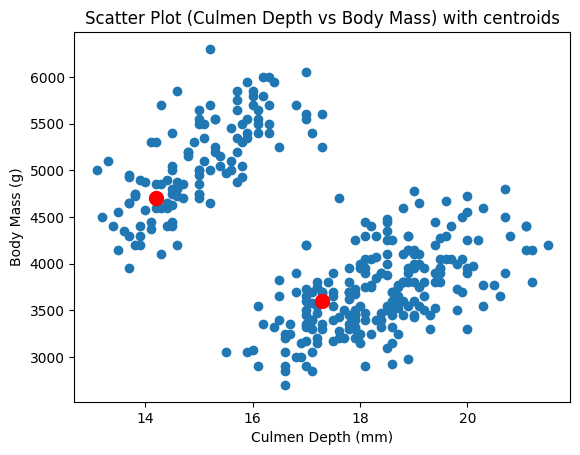

In [120]:
#Visualise data points, red point/observation is the centroids
plt.scatter(numeric_data["Culmen Depth (mm)"], numeric_data["Body Mass (g)"])
plt.scatter(Centroids["Culmen Depth (mm)"],Centroids["Body Mass (g)"],s = 100,c='red')
plt.xlabel('Culmen Depth (mm)')
plt.ylabel('Body Mass (g)')
plt.title("Scatter Plot (Culmen Depth vs Body Mass) with centroids")
plt.show()

<b> Step 3 : </b> Calculate the distance between each instance and the center of each cluster

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
172               41.87              18.06               192.17   
251               47.18              15.70               214.79   

     Body Mass (g)  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
172        3660.21               8.98             -25.47  
251        5060.90               8.37             -26.06  


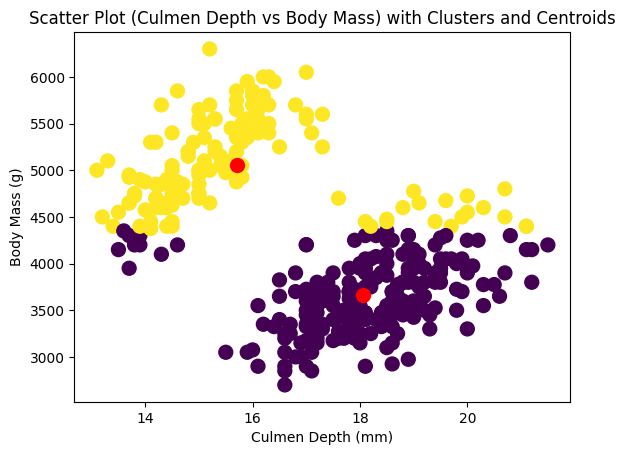

In [121]:
while True:
# function calculates the Euclidean distance between the given single row/observation (obs) and each centroids
# returns the index of the centroids, which this observation belongs to.

    def distance(obs):
        d = np.sqrt(((obs - Centroids) ** 2).sum(axis=1)) # axis = 1, will sum along the row wise
        return d.idxmin() #idxmin() - function returns the index of the centroids, which has minimum distance value.
    
    # Step 4: If the object is closer to the center of another cluster than the one it is currently assigned to, 
    # it is reassigned to the closer cluster
    
    # Apply the function to the entire data set.
    clusters = numeric_data.apply(distance, axis=1)
    
    # Step 5: Recalculate the centroids
    prev_centroids = Centroids
    Centroids = numeric_data.groupby(clusters).mean()
    
    # Step 6: If there is a change in the Centroids dataframe, repeat steps 3-5
    if Centroids.equals(prev_centroids) == True:
        # Plot the cluster assignments.
        clusters = numeric_data.apply(distance, axis=1)
        print(Centroids)
        plt.scatter(numeric_data["Culmen Depth (mm)"],numeric_data["Body Mass (g)"],s = 100,c=clusters) 
        plt.scatter(Centroids["Culmen Depth (mm)"],Centroids["Body Mass (g)"],s = 100,c='red')
        plt.xlabel('Culmen Depth (mm)')
        plt.ylabel('Body Mass (g)')
        plt.title("Scatter Plot (Culmen Depth vs Body Mass) with Clusters and Centroids")
        plt.show()
        break



Some of the data points don't seem to have updated to the right cluster based on the distance function and by cross-checking with the clustering method using sklearn library...

## Flipper Length & Delta 15 N (o/oo) 

### Method 1: Using sklearn Library 
<br> <br>
*We will be choosing a cluster number of 2 since we can see from the prior pairplots that 
 there are 2 partially visible groupings of the data points for columns 'Flipper Length' & 'Delta 15 N (o/oo)'.*


C:\Users\calvi.000\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\calvi.000\AppData\Local\Temp\ipykernel_6324\2339671801.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flipper_delta15N_data["cluster_labels"] = k_means.labels_


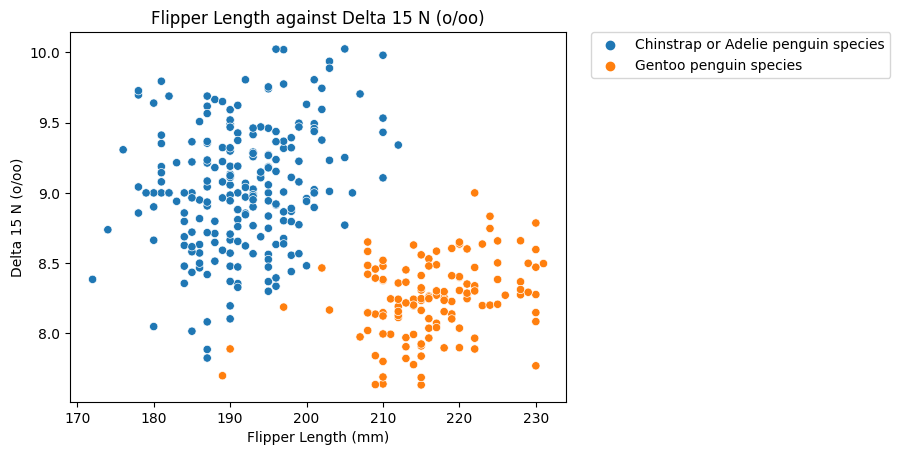

In [122]:
flipper_delta15N_data = numeric_data[["Flipper Length (mm)", "Delta 15 N (o/oo)"]]

# scale the data using minmax scale
scaled_data = minmax_scale(flipper_delta15N_data)

# initialize KMeans object with number of desired clusters:
# We will be choosing a cluster number of 2 since we can see from the prior pairplots that 
# there are 2 groupings of the data points for columns 'Flipper Length' & 'Delta 15 N (o/oo)'.
k_means = KMeans(n_clusters=2)

# fit and transform k_means object to scaled data
k_means.fit_transform(scaled_data)

# extract cluster labels
my_dict = {0: "Chinstrap or Adelie penguin species", 1: "Gentoo penguin species"}
k_means.labels_ = [my_dict[i] for i in k_means.labels_]
flipper_delta15N_data["cluster_labels"] = k_means.labels_

# plot the clusters
sns.scatterplot(data=flipper_delta15N_data, x="Flipper Length (mm)", y="Delta 15 N (o/oo)", hue="cluster_labels")
plt.title("Flipper Length against Delta 15 N (o/oo)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

The above result is in agreement with the results obtained in the EDA section where we found that only the "Chinstrap penguin" and "Adelie penguin" species have an average Delta 15 N (o/oo) ( ratio of stable isotopes 15N:14N) above 8.744 (o/oo), in other words, the "Gentoo penguin" species is the only species with an average Delta 15 N (o/oo) values below 8.744 (o/oo). This is evident from the above clustering of the data points as the data points in orange are primarily addressing the "Gentoo penguin" species as they tend to have Delta 15 N values less than 8.744. We see that their flipper length tends to be higher than the other species, which is also in agreement with the EDA results where we found that only the "Gentoo penguin" species had an average flipper length higher than 200mm., i.e., only the "Gentoo penguin" species has a mean culmen depth lower than 17.5mm. 

<br>

*Uncertainties: These inferences are made based on the mean values of the measurements  for the different species, found in the EDA section. Hence, it is likely that some of the orange data points could be addressing some other species of penguin that is not Gentoo, but it is expected that most of the orange data points are Gentoo based on the inferences made in EDA.*
<br>

### Method 2: Using Lloyd's algorithm 

<b>Step 1 : </b> Decide on the number of clusters k to group objects into

*We will be choosing a cluster number of 2 since we can see from the prior pairplots that  there are 2 partially visible groupings of the data points for columns 'Flipper Length' & 'Delta 15 N (o/oo)'.*


In [123]:
# We will be choosing a cluster number of 2 since we can see from the prior pairplots that 
# there are 2 clear groupings of the data points for columns 'Flipper Length' & 'Delta 15 N (o/oo)'.
K=2

<b> Step 2 : </b> K centroids are randomly assigned

In [124]:
# Step 2 : Select random observation as centroids
Centroids = (numeric_data.sample(n=K))

print("Centroids: ")
print(Centroids)

Centroids: 
     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
13                 38.6               21.2                191.0   
125                40.6               19.0                199.0   

     Body Mass (g)  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
13          3800.0               9.00             -26.00  
125         4000.0               9.23             -25.61  


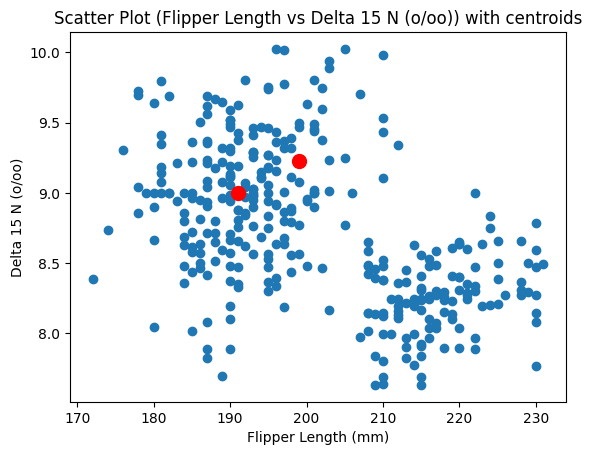

In [125]:
#Visualise data points, red point/observation is the centroids
plt.scatter(numeric_data["Flipper Length (mm)"], numeric_data["Delta 15 N (o/oo)"])
plt.scatter(Centroids["Flipper Length (mm)"],Centroids["Delta 15 N (o/oo)"],s = 100,c='red')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Delta 15 N (o/oo)')
plt.title("Scatter Plot (Flipper Length vs Delta 15 N (o/oo)) with centroids")
plt.show()

<b> Step 3 : </b> Calculate the distance between each instance and the center of each cluster

     Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
13                41.87              18.06               192.17   
125               47.18              15.70               214.79   

     Body Mass (g)  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
13         3660.21               8.98             -25.47  
125        5060.90               8.37             -26.06  


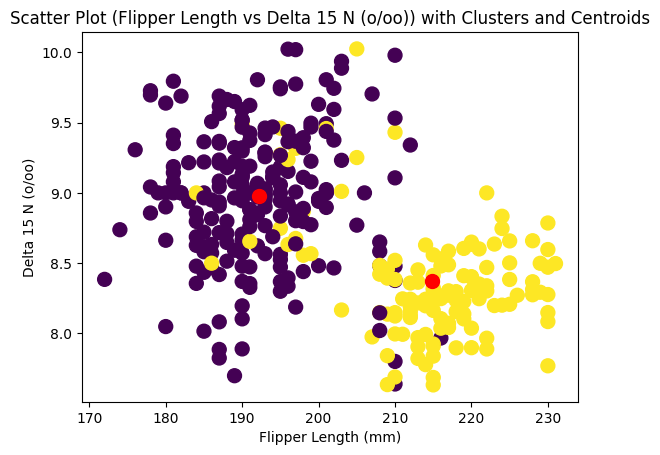

In [126]:
while True:
# function calculates the Euclidean distance between the given single row/observation (obs) and each centroids
# returns the index of the centroids, which this observation belongs to.

    def distance(obs):
        d = np.sqrt(((obs - Centroids) ** 2).sum(axis=1)) # axis = 1, will sum along the row wise
        return d.idxmin() #idxmin() - function returns the index of the centroids, which has minimum distance value.
    
    # Step 4: If the object is closer to the center of another cluster than the one it is currently assigned to, 
    # it is reassigned to the closer cluster
    
    # Apply the function to the entire data set.
    clusters = numeric_data.apply(distance, axis=1)
    
    # Step 5: Recalculate the centroids
    prev_centroids = Centroids
    Centroids = numeric_data.groupby(clusters).mean()
    
    # Step 6: If there is a change in the Centroids dataframe, repeat steps 3-5
    if Centroids.equals(prev_centroids) == True:
        # Plot the cluster assignments.
        clusters = numeric_data.apply(distance, axis=1)
        print(Centroids)
        plt.scatter(numeric_data["Flipper Length (mm)"],numeric_data["Delta 15 N (o/oo)"],s = 100,c=clusters) 
        plt.scatter(Centroids["Flipper Length (mm)"],Centroids["Delta 15 N (o/oo)"],s = 100,c='red')
        plt.xlabel('Flipper Length (mm)')
        plt.ylabel('Delta 15 N (o/oo)')
        plt.title("Scatter Plot (Flipper Length vs Delta 15 N (o/oo)) with Clusters and Centroids")
        plt.show()
        break



Some of the data points don't seem to have updated to the right cluster based on the distance function and by cross-checking with the clustering method using sklearn library...

**Limitations:** <br>
I have only considered k=2 for the number of clusters as they seem to good number for the number of clusters due to the visible separation we see in the data points of the vector space for the chosen pairwise scatter plots. However, a higher number of clusters could improve homogeneity (Elements within a cluster are close to each other) and separation (Elements in different clusters are further apart from each other), particularly the blue data points that could perhaps be further divided into 2 clusters that specify whether the data points are "Chinstrap penguin" or "Adelie penguin". 


One way to find out the ideal number of clusters is by finding the **Silhouette Coefficient** over a range of k, and identifying the peak as the optimum K. Unfortunately I haven't implemented this yet...



# Task 6: Principal Component Analysis (PCA)

- Comment on results
- Plot the percentage of variance explained by each principal component
- Plot principal components of interest
- report observations and limitations

In [150]:
# scaler to scale the data
scaler=StandardScaler()
scaler.fit(numeric_data)

StandardScaler()

In [128]:
# numeric data of penguin measurements, in scaled form
scaled_data=scaler.transform(numeric_data)
scaled_data

array([[-0.8871642 ,  0.78817606, -1.42252288, -0.565791  ,  0.47174629,
        -0.38702367],
       [-0.81357701,  0.12700117, -1.06538679, -0.50316967,  0.37871306,
         1.28678307],
       [-0.66640262,  0.43215881, -0.42254183, -1.1920043 , -0.69354844,
         0.46815046],
       ...,
       [ 1.19167399, -0.73761215,  1.50599306,  1.93906221, -0.8162955 ,
        -0.43981013],
       [ 0.23504049, -1.19534861,  0.79172088,  1.25022757, -0.92548597,
        -0.54048523],
       [ 1.09969   , -0.53417372,  0.8631481 ,  1.50071289, -0.70149795,
        -0.58615571]])

In [129]:
# using PCA from sklearn library
pca=PCA(n_components=numeric_data.columns.size)
pca.fit(scaled_data)

PCA(n_components=6)

In [130]:
# extract the variance of all the principal components
variance_of_principal_components = pca.explained_variance_ratio_ * 100
variance_of_principal_components

array([55.51791545, 24.35200617,  9.05315305,  6.14868536,  3.1996343 ,
        1.72860566])

*You can see that the combined variance of all components in the data retains 100% of the penguin measurement information*

In [131]:
# Let's add the variance to a table
principal_component_table = pd.DataFrame(variance_of_principal_components, columns=['Variance'])
principal_component_table

,Variance
0,55.52
1,24.35
2,9.05
3,6.15
4,3.20
5,1.73


In [132]:
# Calculating the cumulative variance
prev_variance = 0
cumulative = []
for variance in principal_component_table['Variance']:
    cumulative.append(variance + prev_variance)
    prev_variance += variance

cumulative

[55.51791545251778,
 79.86992162739737,
 88.92307468201275,
 95.07176003807487,
 98.27139433540202,
 100.00000000000001]

In [133]:
# add the cumulative variances to the prior table to obtain the final table
principal_component_table['Cumulative'] = cumulative
principal_component_table

,Variance,Cumulative
0,55.52,55.52
1,24.35,79.87
2,9.05,88.92
3,6.15,95.07
4,3.20,98.27
5,1.73,100.00


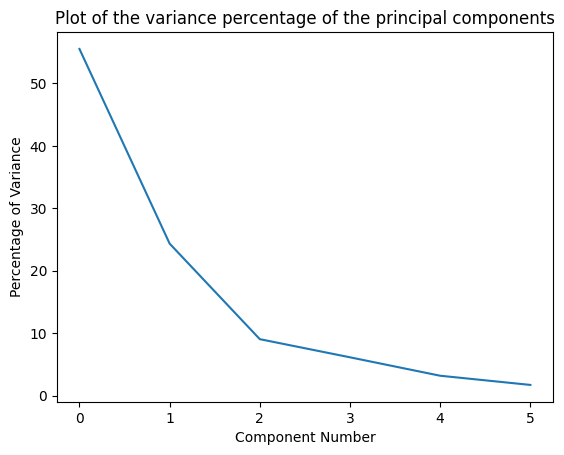

In [134]:
# plotting the variance of each principal component
plt.plot(variance_of_principal_components)
plt.title("Plot of the variance percentage of the principal components")
plt.xlabel("Component Number") 
plt.ylabel("Percentage of Variance") 
plt.show() 

*From the above plot and the final table, it can be observed that the first 3 components contribute towards 55.52% + 24.35% + 9.05% = 88.92% of the variance. Hence 3 would be an admissible number of dimensions for PCA dimensionality reduction that maintains 88.92% of the data variance.*

**Limitation: <br>**
It is important to note that reducing the number of dimensions to 3 halves the dimensions of the numeric data to be processed, however, we lose 11.08% of the data variance in doing so.

let's reduce 'numeric_data' which has 6 dimensions to 3 dimensions...

In [135]:
# set n_components to 3 for PCA
pca=PCA(n_components=3)
pca.fit(scaled_data)

PCA(n_components=3)

In [136]:
pca.n_components_

3

In [137]:
# reduce the data dimensions with pca
reduced_numeric_data=pca.transform(scaled_data)

In [138]:
# shape of the scaled data
scaled_data.shape

(344, 6)

In [139]:
# shape of the reduced data
reduced_numeric_data.shape

(344, 3)

In [140]:
scaled_data

array([[-0.8871642 ,  0.78817606, -1.42252288, -0.565791  ,  0.47174629,
        -0.38702367],
       [-0.81357701,  0.12700117, -1.06538679, -0.50316967,  0.37871306,
         1.28678307],
       [-0.66640262,  0.43215881, -0.42254183, -1.1920043 , -0.69354844,
         0.46815046],
       ...,
       [ 1.19167399, -0.73761215,  1.50599306,  1.93906221, -0.8162955 ,
        -0.43981013],
       [ 0.23504049, -1.19534861,  0.79172088,  1.25022757, -0.92548597,
        -0.54048523],
       [ 1.09969   , -0.53417372,  0.8631481 ,  1.50071289, -0.70149795,
        -0.58615571]])

In [141]:
reduced_numeric_data

array([[-1.65179323, -0.89887682,  0.49668866],
       [-1.60891006,  0.03227364, -0.79189428],
       [-1.02255281, -0.66514202, -0.4828961 ],
       ...,
       [ 2.81709179,  0.79438315,  0.38011789],
       [ 2.10595112, -0.29978769, -0.25290121],
       [ 2.16727605,  0.5061068 ,  0.38643072]])

**Comments:** <br>
It can be observed that we have reduced the dimensions of 'numeric_data' from 6 to 3 while retaining ~88.92% of the penguin measurement information from 'numeric_data' data (data in 6 dimensions). In other words, ~88.92% of the information in the 'numeric_data' is captured by performing principal component analysis on the data, while reducing the number of dimensions of data from 6 to 3.
This removes redundant information and reduces the complexity of computing similarity.

Text(0, 0.5, 'Second principle component')

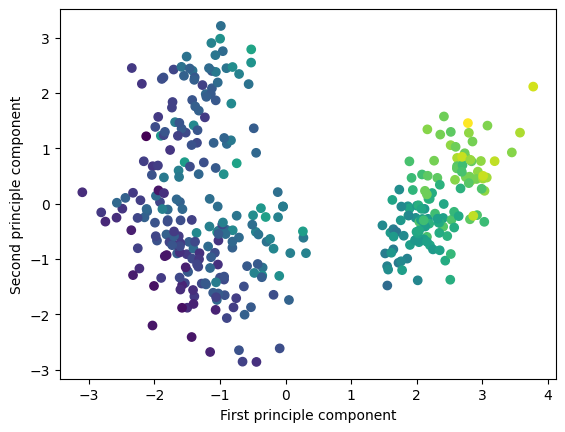

In [142]:
# make a scatter plot of the first 2 principal components
plt.scatter(reduced_numeric_data[:,0],reduced_numeric_data[:,1],c=numeric_data["Body Mass (g)"])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

**Comments:** <br>
The data points in the above plot in 2 dimensions retain ~79.9% (only the first 2 principal components) of the penguin measurement information from 'numeric_data' data (data in 6 dimensions). In other words, ~79.9% of the information in the 'numeric_data' is captured by performing principal component analysis on the data, while reducing the number of dimensions of data from 6 to 2.

We can also observe that the data points can approximately be separated into 3 types by grouping based on the body mass of the penguin:
- Purple
- Green
- Yellow

These classification of the data points maybe hinting at the different penguin species, with the yellowish data points tending towards the 'Gentoo penguin' species due to their comparatively higher mean body mass, although I'm not quite sure at this stage. Further analysis needs to be done to garner more solid insights...